# Libraries which we use

In [434]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import *
from phik.report import plot_correlation_matrix
import seaborn as sns

# Loading train and test datasets

In [591]:
train = pd.read_csv("train.csv", index_col = 0)
train.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                             
0   55.0       170.0        80.0       92.0             1.2              0.8   
1   30.0       170.0        80.0       94.0             1.5              1.5   
2   45.0       170.0        75.0       84.0             1.0              1.0   
3   55.0       150.0        55.0       85.0             0.9              0.5   
4   45.0       160.0        55.0       72.0             0.5              0.6   

    hearing(left)  hearing(right)  systolic  relaxation  ...   HDL    LDL  \
id                                                       ...                
0             1.0             1.0     129.0        74.0  ...  49.0  114.0   
1             1.0             1.0     128.0        84.0  ...  51.0  111.0   
2             1.0             1.0     124.0        80.0  ...  52.0  112.0   
3             1.0             1.0     123.0        79.0  ...  61.0  119.0   
4             1.0             1.0     117.0        76.0  ...  61.0  120.0   

    hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
id                                                                  
0         15.4            1.0               0.9  20.0  23.0  13.0   
1         16.2            1.0               0.9  30.0  39.0  92.0   
2         14.6            2.0               0.9  20.0  20.0  50.0   
3         13.4            1.0               0.8  25.0  20.0  18.0   
4         13.9            1.0               0.7  20.0  26.0  10.0   

    dental caries  smoking  
id                          
0             0.0      0.0  
1             0.0      1.0  
2             0.0      1.0  
3             0.0      0.0  
4             0.0      0.0  

[5 rows x 23 columns]

In [592]:
test = pd.read_csv("test.csv", index_col = 0)
test.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
id                                                               
15000  40.0       175.0        70.0       84.0             1.5   
15001  45.0       155.0        55.0       72.4             0.6   
15002  40.0       160.0        55.0       76.0             1.2   
15003  45.0       150.0        50.0       74.4             1.0   
15004  35.0       185.0        80.0       90.0             0.8   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
id                                                                            
15000              1.5            1.0             1.0     120.0        59.0   
15001              0.5            1.0             1.0     102.0        68.0   
15002              1.2            1.0             1.0     115.0        64.0   
15003              1.0            1.0             1.0      96.0        67.0   
15004              1.0            1.0             1.0     113.0        73.0   

       ...  triglyceride   HDL    LDL  hemoglobin  Urine protein  \
id     ...                                                         
15000  ...         122.0  45.0  109.0        16.0            1.0   
15001  ...         104.0  56.0  109.0        11.5            1.0   
15002  ...          84.0  77.0   74.0        13.3            1.0   
15003  ...          63.0  85.0   82.0        13.4            1.0   
15004  ...          89.0  59.0  105.0        15.6            1.0   

       serum creatinine   AST   ALT   Gtp  dental caries  
id                                                        
15000               1.0  15.0   9.0  25.0            0.0  
15001               0.8  14.0  10.0  13.0            0.0  
15002               0.8  14.0  10.0  11.0            0.0  
15003               0.7  23.0  15.0  18.0            0.0  
15004               0.9  16.0  26.0  20.0            0.0  

[5 rows x 22 columns]

In [593]:
train1 = train.copy()
test1 = test.copy()
seed=1

##  Columns Describtion 

In [284]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

### Translation to russian:

1. **age** — возраст
2. **height(cm)** — рост (см)
3. **weight(kg)** — вес (кг)
4. **waist(cm)** — талия (см)
5. **eyesight(left)** — зрение (левый глаз)
6. **eyesight(right)** — зрение (правый глаз)
7. **hearing(left)** — слух (левое ухо)
8. **hearing(right)** — слух (правое ухо)
9. **systolic** — систолическое давление
10. **relaxation** — диастолическое давление (иногда так называют)
11. **fasting blood sugar** — уровень сахара в крови натощак
12. **Cholesterol** — холестерин
13. **triglyceride** — триглицериды
14. **HDL** — ЛПВП (липопротеины высокой плотности, "хороший" холестерин)
15. **LDL** — ЛПНП (липопротеины низкой плотности, "плохой" холестерин)
16. **hemoglobin** — гемоглобин
17. **Urine protein** — белок в моче
18. **serum creatinine** — сывороточный креатинин
19. **AST** — аспартатаминотрансфераза (фермент печени)
20. **ALT** — аланинаминотрансфераза (фермент печени)
21. **Gtp** — гамма-глутамилтрансфераза (фермент печени)
22. **dental caries** — кариес зубов
23. **smoking** — курение

## Analyzing train and test datasets

In [285]:
train.describe().T

count        mean        std    min    25%    50%  \
age                  15000.0   42.659667  10.514524   20.0   40.0   40.0   
height(cm)           15000.0  164.669333   8.524211  140.0  160.0  165.0   
weight(kg)           15000.0   64.235333  10.999092   40.0   55.0   65.0   
waist(cm)            15000.0   80.251100   7.927326    1.0   75.0   80.0   
eyesight(left)       15000.0    1.034373   0.304866    0.1    0.9    1.0   
eyesight(right)      15000.0    1.029453   0.302373    0.1    0.8    1.0   
hearing(left)        15000.0    1.005600   0.074626    1.0    1.0    1.0   
hearing(right)       15000.0    1.006000   0.077230    1.0    1.0    1.0   
systolic             15000.0  119.219133  11.151900   84.0  110.0  119.0   
relaxation           15000.0   74.963667   7.956559   42.0   70.0   75.0   
fasting blood sugar  15000.0   95.032733  10.663504   51.0   89.0   94.0   
Cholesterol          15000.0  191.225800  20.568081  108.0  177.0  191.0   
triglyceride         15000.0  101.861400  47.553005   22.0   70.0   90.0   
HDL                  15000.0   57.374733  11.436670   28.0   49.0   56.0   
LDL                  15000.0  113.391200  18.574279   47.0  100.0  113.0   
hemoglobin           15000.0   14.505213   1.398364    7.3   13.5   14.7   
Urine protein        15000.0    1.016067   0.160656    1.0    1.0    1.0   
serum creatinine     15000.0    0.866873   0.165501    0.1    0.8    0.9   
AST                  15000.0   22.236600   5.640184   10.0   18.0   21.0   
ALT                  15000.0   20.859400  10.310916    5.0   14.0   18.0   
Gtp                  15000.0   26.289933  18.685708    6.0   15.0   21.0   
dental caries        15000.0    0.145733   0.352850    0.0    0.0    0.0   
smoking              15000.0    0.369133   0.482586    0.0    0.0    0.0   

                       75%    max  
age                   50.0   85.0  
height(cm)           170.0  190.0  
weight(kg)            70.0  120.0  
waist(cm)             86.0  117.0  
eyesight(left)         1.2    9.9  
eyesight(right)        1.2    9.9  
hearing(left)          1.0    2.0  
hearing(right)         1.0    2.0  
systolic             128.0  199.0  
relaxation            80.0  122.0  
fasting blood sugar  100.0  369.0  
Cholesterol          205.0  295.0  
triglyceride         120.0  399.0  
HDL                   65.0  107.0  
LDL                  126.0  202.0  
hemoglobin            15.6   18.8  
Urine protein          1.0    5.0  
serum creatinine       1.0    1.5  
AST                   25.0   87.0  
ALT                   24.0  166.0  
Gtp                   31.0  439.0  
dental caries          0.0    1.0  
smoking                1.0    1.0

In [286]:
train.describe().T.shape

(23, 8)

In [287]:
test.describe().T

count       mean        std    min    25%    50%  \
age                  10000.0   42.65500  10.467184   20.0   40.0   40.0   
height(cm)           10000.0  164.70400   8.444200  140.0  160.0  165.0   
weight(kg)           10000.0   64.33450  11.118767    0.0   55.0   65.0   
waist(cm)            10000.0   80.35384   7.984140   58.0   75.0   80.0   
eyesight(left)       10000.0    1.03478   0.297848    0.1    0.9    1.0   
eyesight(right)      10000.0    1.02969   0.310666    0.1    0.8    1.0   
hearing(left)        10000.0    1.00550   0.073961    1.0    1.0    1.0   
hearing(right)       10000.0    1.00630   0.079126    1.0    1.0    1.0   
systolic             10000.0  119.29210  11.151090   66.0  110.0  119.0   
relaxation           10000.0   75.00710   7.968400    1.0   70.0   76.0   
fasting blood sugar  10000.0   95.01280  10.895564   65.0   89.0   94.0   
Cholesterol          10000.0  191.09390  20.352108  109.0  177.0  190.0   
triglyceride         10000.0  102.55670  47.832876   20.0   70.0   91.0   
HDL                  10000.0   57.41810  11.535632   28.0   49.0   56.0   
LDL                  10000.0  113.10390  18.508532   45.0  100.0  112.0   
hemoglobin           10000.0   14.49983   1.395635    7.4   13.5   14.7   
Urine protein        10000.0    1.01700   0.166475    1.0    1.0    1.0   
serum creatinine     10000.0    0.86351   0.166998    0.2    0.7    0.9   
AST                  10000.0   22.25070   5.768031    9.0   18.0   21.0   
ALT                  10000.0   20.86410  10.286448    4.0   14.0   18.0   
Gtp                  10000.0   26.33180  19.156680    6.0   15.0   21.0   
dental caries        10000.0    0.14400   0.351107    0.0    0.0    0.0   

                       75%    max  
age                   50.0   80.0  
height(cm)           170.0  190.0  
weight(kg)            70.0  155.0  
waist(cm)             86.0  117.0  
eyesight(left)         1.2    9.9  
eyesight(right)        1.2    9.9  
hearing(left)          1.0    2.0  
hearing(right)         1.0    2.0  
systolic             128.0  174.0  
relaxation            80.0  117.0  
fasting blood sugar   99.0  369.0  
Cholesterol          205.0  283.0  
triglyceride         121.0  432.0  
HDL                   65.0  108.0  
LDL                  126.0  193.0  
hemoglobin            15.6   18.9  
Urine protein          1.0    5.0  
serum creatinine       1.0    1.5  
AST                   25.0   68.0  
ALT                   24.0  129.0  
Gtp                   31.0  310.0  
dental caries          0.0    1.0

#### Categorik datalarni yo'qligini ko'ramiz

In [288]:
train.select_dtypes("category")

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[15000 rows x 0 columns]

Yo'q ekan

#### Nulllari borligini ko'ramiz

In [289]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   height(cm)           15000 non-null  float64
 2   weight(kg)           15000 non-null  float64
 3   waist(cm)            15000 non-null  float64
 4   eyesight(left)       15000 non-null  float64
 5   eyesight(right)      15000 non-null  float64
 6   hearing(left)        15000 non-null  float64
 7   hearing(right)       15000 non-null  float64
 8   systolic             15000 non-null  float64
 9   relaxation           15000 non-null  float64
 10  fasting blood sugar  15000 non-null  float64
 11  Cholesterol          15000 non-null  float64
 12  triglyceride         15000 non-null  float64
 13  HDL                  15000 non-null  float64
 14  LDL                  15000 non-null  float64
 15  hemoglobin           15000 non-null  floa

In [290]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15000 to 24999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   height(cm)           10000 non-null  float64
 2   weight(kg)           10000 non-null  float64
 3   waist(cm)            10000 non-null  float64
 4   eyesight(left)       10000 non-null  float64
 5   eyesight(right)      10000 non-null  float64
 6   hearing(left)        10000 non-null  float64
 7   hearing(right)       10000 non-null  float64
 8   systolic             10000 non-null  float64
 9   relaxation           10000 non-null  float64
 10  fasting blood sugar  10000 non-null  float64
 11  Cholesterol          10000 non-null  float64
 12  triglyceride         10000 non-null  float64
 13  HDL                  10000 non-null  float64
 14  LDL                  10000 non-null  float64
 15  hemoglobin           10000 non-null  

In [291]:
train.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [292]:
test.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
dtype: int64

#### smoking lar sonini ko'ramiz

In [293]:
train["smoking"].value_counts()

smoking
0.0    9463
1.0    5537
Name: count, dtype: int64

In [294]:
train["smoking"].value_counts()/len(train)*100

smoking
0.0    63.086667
1.0    36.913333
Name: count, dtype: float64

# Analyzing features

нужно будет

In [295]:
train.nunique()

age                     14
height(cm)              11
weight(kg)              16
waist(cm)              356
eyesight(left)          14
eyesight(right)         15
hearing(left)            2
hearing(right)           2
systolic                77
relaxation              59
fasting blood sugar    111
Cholesterol            148
triglyceride           314
HDL                     74
LDL                    139
hemoglobin             105
Urine protein            5
serum creatinine        13
AST                     58
ALT                     96
Gtp                    162
dental caries            2
smoking                  2
dtype: int64

In [296]:
test.nunique()

age                     13
height(cm)              11
weight(kg)              19
waist(cm)              328
eyesight(left)          15
eyesight(right)         14
hearing(left)            2
hearing(right)           2
systolic                74
relaxation              60
fasting blood sugar    101
Cholesterol            140
triglyceride           308
HDL                     74
LDL                    135
hemoglobin             104
Urine protein            5
serum creatinine        13
AST                     59
ALT                     93
Gtp                    148
dental caries            2
dtype: int64

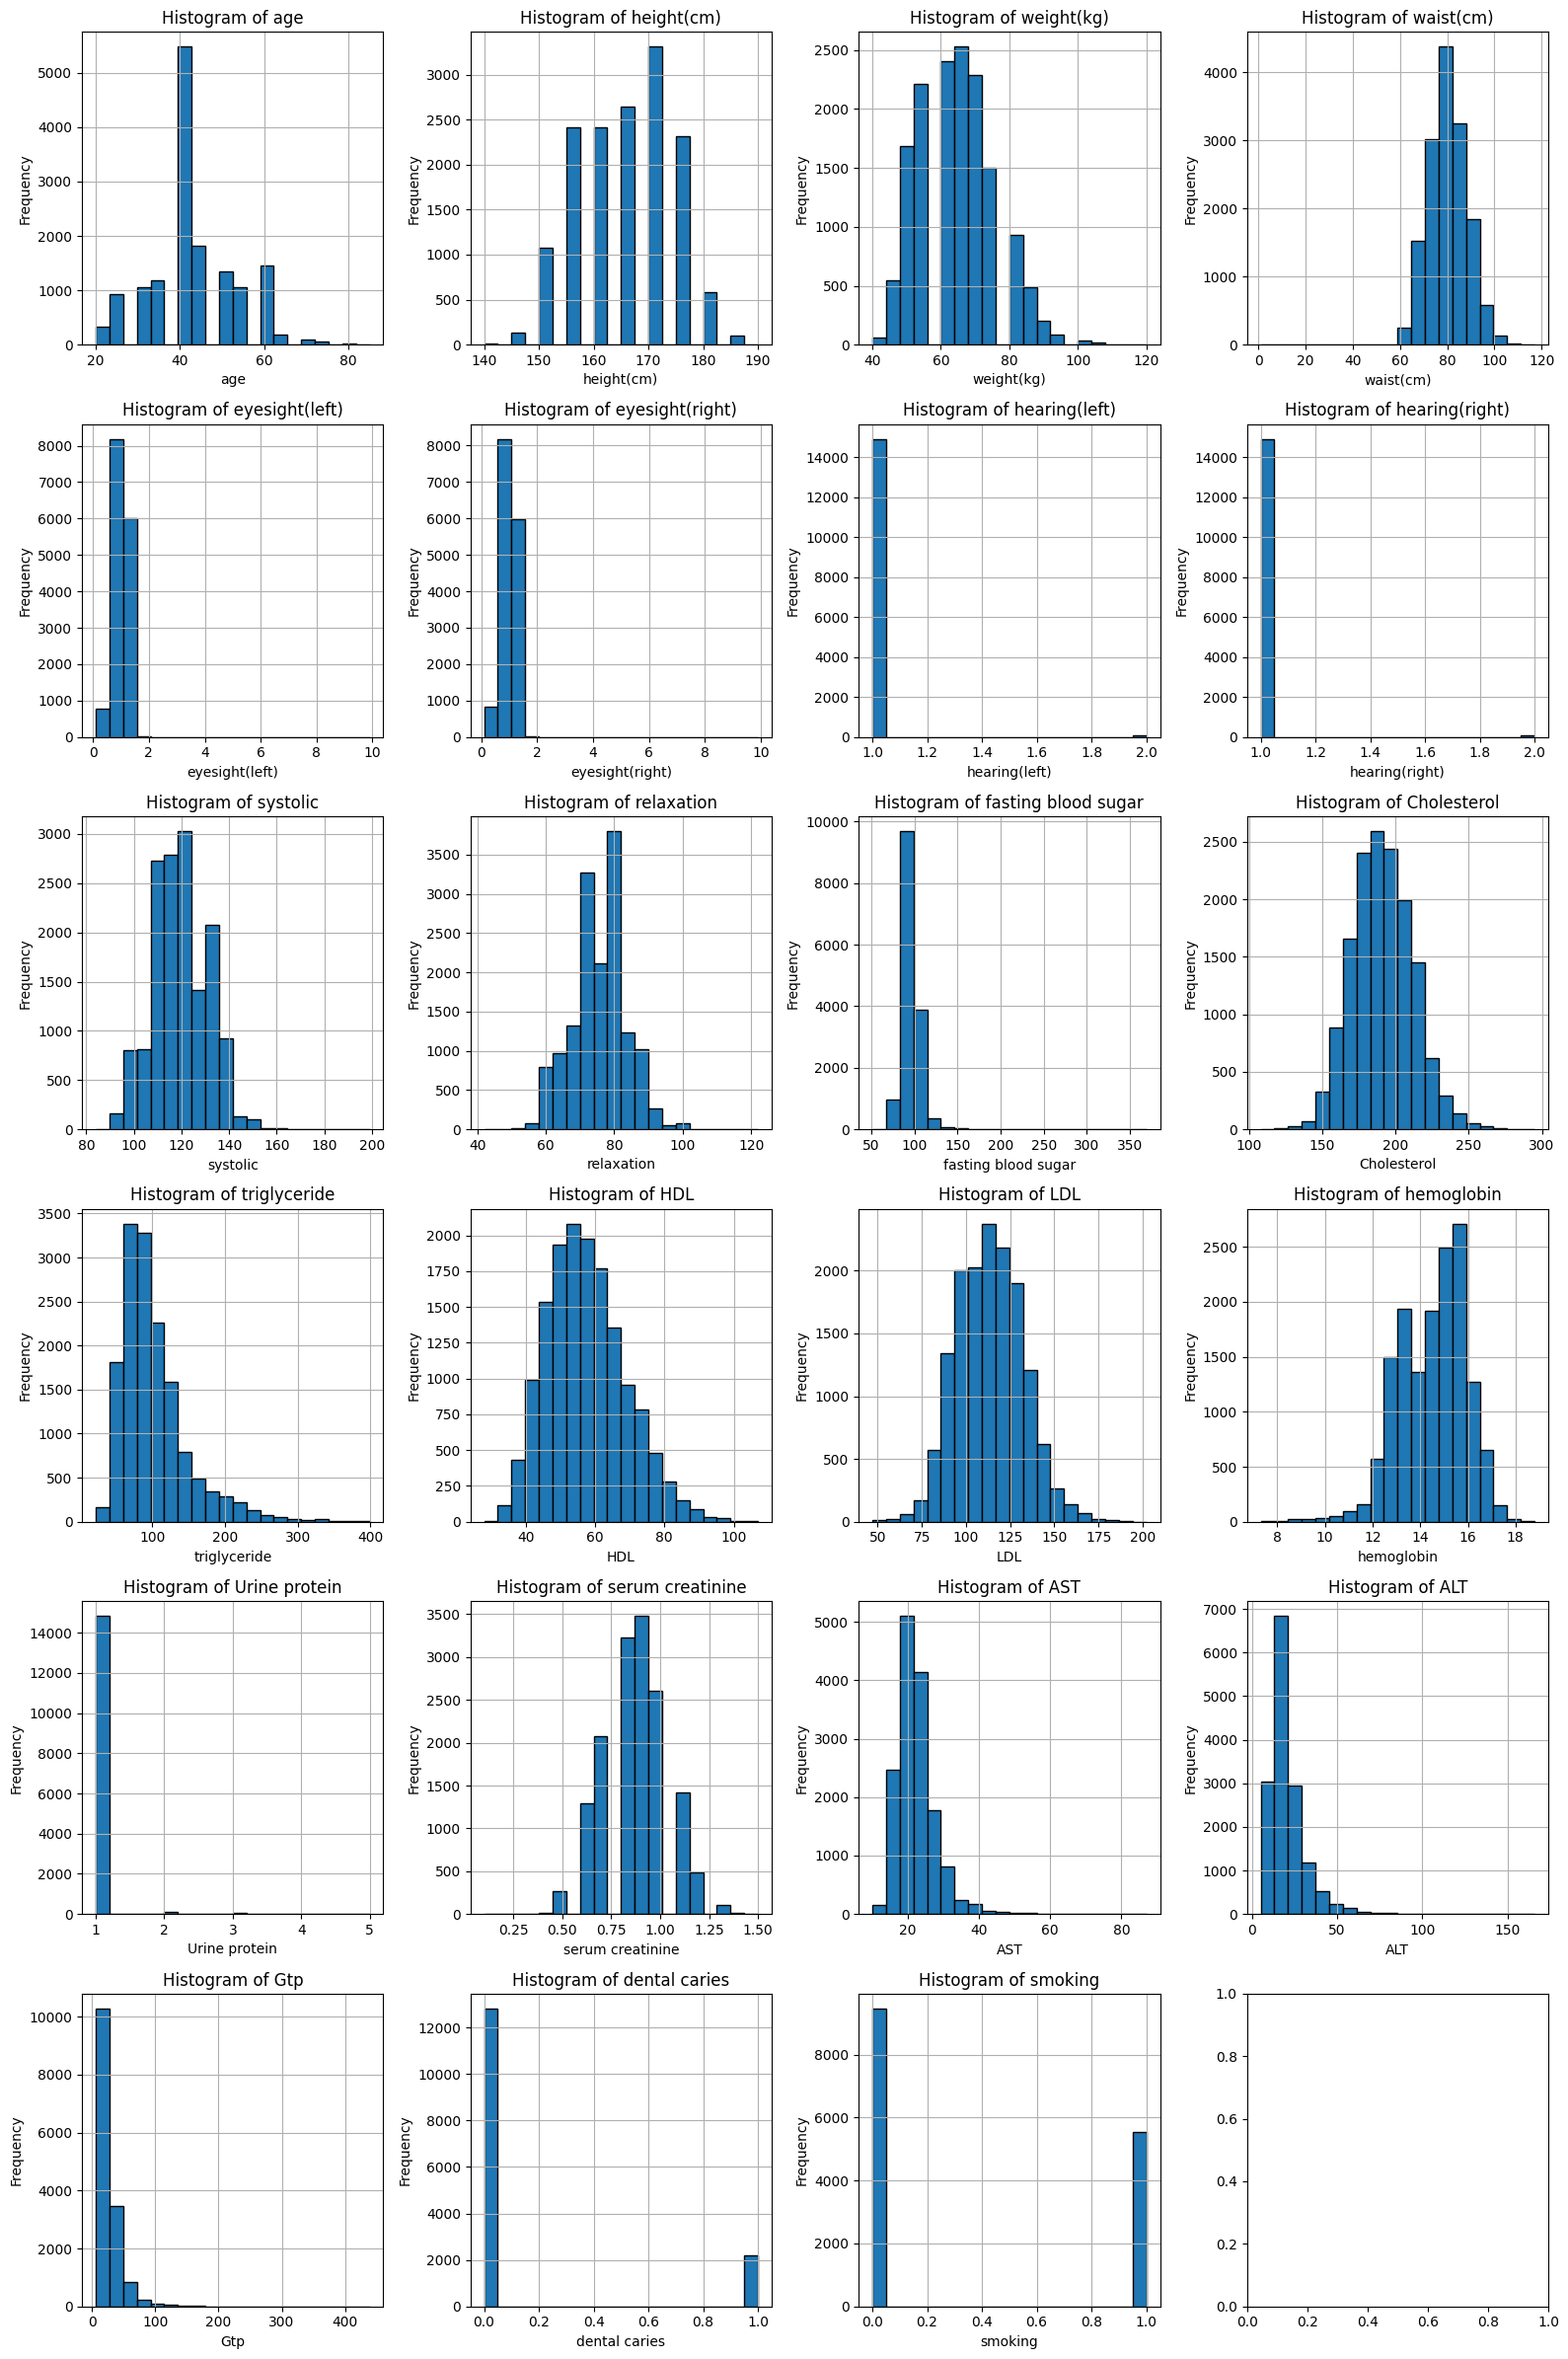

In [297]:
import matplotlib.pyplot as plt

# Set up the grid for the subplots (4 rows, 6 columns)
fig, axes = plt.subplots(6, 4, figsize=(16, 24))  # Adjust figsize for better spacing

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(train.columns):
    # Plot histogram in each subplot
    train[col].hist(bins=20, edgecolor='black', ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Adjust layout to prevent overlapping plots
plt.tight_layout()
plt.show()


# Correlations

In [298]:
df = train.copy()
df1 = df.copy()

In [299]:
df.head(1)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                             
0   55.0       170.0        80.0       92.0             1.2              0.8   

    hearing(left)  hearing(right)  systolic  relaxation  ...   HDL    LDL  \
id                                                       ...                
0             1.0             1.0     129.0        74.0  ...  49.0  114.0   

    hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
id                                                                  
0         15.4            1.0               0.9  20.0  23.0  13.0   

    dental caries  smoking  
id                          
0             0.0      0.0  

[1 rows x 23 columns]

In [300]:
df1.head(1)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                             
0   55.0       170.0        80.0       92.0             1.2              0.8   

    hearing(left)  hearing(right)  systolic  relaxation  ...   HDL    LDL  \
id                                                       ...                
0             1.0             1.0     129.0        74.0  ...  49.0  114.0   

    hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
id                                                                  
0         15.4            1.0               0.9  20.0  23.0  13.0   

    dental caries  smoking  
id                          
0             0.0      0.0  

[1 rows x 23 columns]

## Pearson corr

In [301]:
# Pearson Correlatsiyasi funksiyasi(qo'lbola)
def pearson_corr(x, y): 
    x_mean = x.mean()
    y_mean = y.mean()  # This should be y.mean() instead of x.mean()
    surat = np.sum((x - x_mean) * (y - y_mean))
    maxraj = (np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))**(0.5)
    return surat / maxraj

# Pearson  funksiysasi  testi
x = df1['LDL'].dropna()
y = df1['smoking'].dropna()
pearson_correlatsiya = pearson_corr(x, y)
print(f"Qo'lbola Pearson: {pearson_correlatsiya}")

Qo'lbola Pearson: -0.03566532512120103


In [380]:
df = df[df.drop("smoking", axis=1).columns.tolist()+['smoking']]


In [382]:
df1.corr()

age  height(cm)  weight(kg)  waist(cm)  \
age                  1.000000   -0.489060   -0.324329  -0.034842   
height(cm)          -0.489060    1.000000    0.717036   0.438940   
weight(kg)          -0.324329    0.717036    1.000000   0.825413   
waist(cm)           -0.034842    0.438940    0.825413   1.000000   
eyesight(left)      -0.354086    0.268237    0.202310   0.070780   
eyesight(right)     -0.350489    0.267593    0.197314   0.062995   
hearing(left)        0.136935   -0.046873   -0.030928   0.009930   
hearing(right)       0.149071   -0.051168   -0.045223  -0.002439   
systolic             0.126487    0.142070    0.328412   0.369376   
relaxation           0.068520    0.167407    0.330886   0.351661   
fasting blood sugar  0.174922    0.046621    0.168826   0.231402   
Cholesterol          0.179284   -0.106021    0.038466   0.117263   
triglyceride         0.019275    0.252003    0.415135   0.434590   
HDL                  0.035509   -0.308854   -0.428095  -0.433371   
LDL                  0.166660   -0.055459    0.094732   0.175521   
hemoglobin          -0.276232    0.627776    0.568848   0.448312   
Urine protein        0.002329   -0.002693    0.021479   0.030519   
serum creatinine    -0.209206    0.544857    0.474629   0.344824   
AST                  0.120473    0.079000    0.206830   0.257397   
ALT                 -0.085207    0.289523    0.469154   0.463373   
Gtp                 -0.028772    0.283350    0.392769   0.399473   
dental caries       -0.108703    0.118763    0.109541   0.073551   
smoking             -0.193103    0.494092    0.399787   0.300887   

                     eyesight(left)  eyesight(right)  hearing(left)  \
age                       -0.354086        -0.350489       0.136935   
height(cm)                 0.268237         0.267593      -0.046873   
weight(kg)                 0.202310         0.197314      -0.030928   
waist(cm)                  0.070780         0.062995       0.009930   
eyesight(left)             1.000000         0.674314      -0.056814   
eyesight(right)            0.674314         1.000000      -0.058425   
hearing(left)             -0.056814        -0.058425       1.000000   
hearing(right)            -0.059164        -0.061243       0.514738   
systolic                  -0.016843        -0.016769       0.034175   
relaxation                 0.011748         0.016449       0.006182   
fasting blood sugar       -0.044956        -0.042065       0.022642   
Cholesterol               -0.045358        -0.042686      -0.002170   
triglyceride               0.045554         0.060785       0.002154   
HDL                       -0.042871        -0.046681      -0.013005   
LDL                       -0.047291        -0.050737       0.004576   
hemoglobin                 0.155087         0.163083      -0.006477   
Urine protein             -0.010732        -0.012350      -0.001944   
serum creatinine           0.133605         0.128879       0.009083   
AST                       -0.032523        -0.027073       0.020295   
ALT                        0.080227         0.084492      -0.021072   
Gtp                        0.058225         0.065291      -0.003890   
dental caries              0.038897         0.047001      -0.010740   
smoking                    0.128234         0.134564      -0.007418   

                     hearing(right)  systolic  relaxation  ...       HDL  \
age                        0.149071  0.126487    0.068520  ...  0.035509   
height(cm)                -0.051168  0.142070    0.167407  ... -0.308854   
weight(kg)                -0.045223  0.328412    0.330886  ... -0.428095   
waist(cm)                 -0.002439  0.369376    0.351661  ... -0.433371   
eyesight(left)            -0.059164 -0.016843    0.011748  ... -0.042871   
eyesight(right)           -0.061243 -0.016769    0.016449  ... -0.046681   
hearing(left)              0.514738  0.034175    0.006182  ... -0.013005   
hearing(right)             1.000000  0.026187   -0.008976  ... -0.007603   
syst

In [383]:
df[['smoking'] + df.drop("smoking", axis=1).columns.tolist()].corr()

smoking       age  height(cm)  weight(kg)  \
smoking                        1.000000 -0.193103    0.494092    0.399787   
age                           -0.193103  1.000000   -0.489060   -0.324329   
height(cm)                     0.494092 -0.489060    1.000000    0.717036   
weight(kg)                     0.399787 -0.324329    0.717036    1.000000   
waist(cm)                      0.300887 -0.034842    0.438940    0.825413   
eyesight(left)                 0.128234 -0.354086    0.268237    0.202310   
eyesight(right)                0.134564 -0.350489    0.267593    0.197314   
hearing(left)                 -0.007418  0.136935   -0.046873   -0.030928   
hearing(right)                -0.002186  0.149071   -0.051168   -0.045223   
systolic                       0.123260  0.126487    0.142070    0.328412   
relaxation                     0.152125  0.068520    0.167407    0.330886   
fasting blood sugar            0.103526  0.174922    0.046621    0.168826   
Cholesterol                   -0.034782  0.179284   -0.106021    0.038466   
triglyceride                   0.345541  0.019275    0.252003    0.415135   
HDL                           -0.290750  0.035509   -0.308854   -0.428095   
LDL                           -0.035665  0.166660   -0.055459    0.094732   
hemoglobin                     0.503442 -0.276232    0.627776    0.568848   
Urine protein                 -0.008566  0.002329   -0.002693    0.021479   
serum creatinine               0.351120 -0.209206    0.544857    0.474629   
AST                            0.101480  0.120473    0.079000    0.206830   
ALT                            0.241721 -0.085207    0.289523    0.469154   
Gtp                            0.377667 -0.028772    0.283350    0.392769   
dental caries                  0.148421 -0.108703    0.118763    0.109541   
BMI                            0.147441 -0.035361    0.160672    0.799258   
HW_Ratio                      -0.318668  0.203994   -0.519985   -0.948490   
WHR                            0.043890  0.249810   -0.098615    0.490592   
Blood_Pressure_Category       -0.107389 -0.103756   -0.118102   -0.261683   
Cholesterol_Ratio             -0.170188 -0.074835   -0.175393   -0.345087   
Liver_Enzyme_Ratio            -0.285415  0.173311   -0.370347   -0.504101   
Hemoglobin_Gtp_Ratio          -0.380928 -0.017422   -0.283094   -0.429299   
Systolic_Diastolic_Ratio      -0.065636  0.060183   -0.060113   -0.061495   
Blood_Sugar_Cholesterol_Index  0.049720  0.230657   -0.034997    0.141872   
Eyesight_Score                 0.143597 -0.385037    0.292816    0.218394   
Age_BMI_Ratio                 -0.235765  0.898942   -0.501170   -0.618214   
Weight_Height_Age_Index       -0.016435  0.852013   -0.198607    0.189858   
Lipid_Profile_Ratio            0.276410  0.080976    0.172410    0.361112   
Metabolic_Risk_Index           0.159965  0.084293    0.132510    0.630952   
Cardio_Risk_Index              0.099831  0.231462    0.024900    0.497424   
Renal_Function_Index          -0.128818  0.096675   -0.271228   -0.218124   
Hearing_Imbalance             -0.005142 -0.017289    0.006064    0.015828   
Eyesight_Imbalance            -0.006507 -0.008042    0.003524    0.008223   
Hemoglobin_Cholesterol_Ratio   0.361043 -0.315602    0.493582    0.347900   
Cardio_Metabolic_Index         0.171094  0.116131    0.156572    0.623348   

                               waist(cm)  eyesight(left)  eyesight(right)  \
smoking                         0.300887        0.128234         0.134564   
age                            -0.034842       -0.354086        -0.350489   
height(cm)                      0.438940        0.268237         0.267593   
weight(kg)                      0.825413        0.202310         0.197314   
waist(cm)                       1.000000        0.070780         0.062995   
eyesight(left)                  0.070780        1.000000         0.674314   
eyesight(right)                 0.062995        0.674314         1.000000   
hearing(left)              

## Spearman

In [303]:
# Spearman Correlatsiyasi funksiyasi(qo'lbola)
def spearman_corr(x, y):
    # Rank the data
    x_rank = pd.Series(x).rank()
    y_rank = pd.Series(y).rank()

    return pearson_corr(x_rank, y_rank)

# Spearman funksiysasi testi
spearman = spearman_corr(x, y)
print(f"Qo'lbola Spearman: {spearman}")

Qo'lbola Spearman: -0.028517824660002185


In [385]:
df1.corr(method="spearman")

age  height(cm)  weight(kg)  waist(cm)  \
age                  1.000000   -0.510786   -0.349335  -0.062146   
height(cm)          -0.510786    1.000000    0.737574   0.450768   
weight(kg)          -0.349335    0.737574    1.000000   0.818349   
waist(cm)           -0.062146    0.450768    0.818349   1.000000   
eyesight(left)      -0.386364    0.288053    0.222567   0.075242   
eyesight(right)     -0.379797    0.286076    0.215223   0.071500   
hearing(left)        0.102091   -0.042505   -0.030946   0.009513   
hearing(right)       0.111826   -0.046688   -0.048053  -0.005465   
systolic             0.100314    0.150287    0.324399   0.362536   
relaxation           0.056741    0.172532    0.328650   0.343274   
fasting blood sugar  0.166268    0.057684    0.187790   0.244349   
Cholesterol          0.187682   -0.095471    0.036778   0.124371   
triglyceride         0.019261    0.278895    0.439331   0.469565   
HDL                  0.055992   -0.318235   -0.438387  -0.442571   
LDL                  0.167751   -0.044543    0.096544   0.184256   
hemoglobin          -0.332029    0.662319    0.612656   0.464775   
Urine protein       -0.007821    0.001716    0.012045   0.020848   
serum creatinine    -0.243367    0.570620    0.513331   0.364901   
AST                  0.144984    0.084948    0.191312   0.250914   
ALT                 -0.061140    0.338830    0.494615   0.499136   
Gtp                 -0.067174    0.411283    0.533782   0.530488   
dental caries       -0.114961    0.121708    0.108528   0.073472   
smoking             -0.201190    0.500788    0.416911   0.306103   

                     eyesight(left)  eyesight(right)  hearing(left)  \
age                       -0.386364        -0.379797       0.102091   
height(cm)                 0.288053         0.286076      -0.042505   
weight(kg)                 0.222567         0.215223      -0.030946   
waist(cm)                  0.075242         0.071500       0.009513   
eyesight(left)             1.000000         0.761239      -0.059085   
eyesight(right)            0.761239         1.000000      -0.061436   
hearing(left)             -0.059085        -0.061436       1.000000   
hearing(right)            -0.061784        -0.066655       0.514738   
systolic                  -0.026066        -0.019915       0.031678   
relaxation                 0.003439         0.012399       0.002891   
fasting blood sugar       -0.030506        -0.036059       0.020226   
Cholesterol               -0.049906        -0.051028      -0.003600   
triglyceride               0.033757         0.041534       0.008271   
HDL                       -0.039859        -0.045238      -0.012939   
LDL                       -0.047887        -0.052195       0.003415   
hemoglobin                 0.183549         0.187564      -0.010367   
Urine protein             -0.006471        -0.001598      -0.000048   
serum creatinine           0.154200         0.151228       0.007946   
AST                       -0.047556        -0.046292       0.034479   
ALT                        0.073815         0.071461      -0.018926   
Gtp                        0.077051         0.082852       0.003424   
dental caries              0.044099         0.044335      -0.010740   
smoking                    0.134552         0.144532      -0.007418   

                     hearing(right)  systolic  relaxation  ...       HDL  \
age                        0.111826  0.100314    0.056741  ...  0.055992   
height(cm)                -0.046688  0.150287    0.172532  ... -0.318235   
weight(kg)                -0.048053  0.324399    0.328650  ... -0.438387   
waist(cm)                 -0.005465  0.362536    0.343274  ... -0.442571   
eyesight(left)            -0.061784 -0.026066    0.003439  ... -0.039859   
eyesight(right)           -0.066655 -0.019915    0.012399  ... -0.045238   
hearing(left)              0.514738  0.031678    0.002891  ... -0.012939   
hearing(right)             1.000000  0.027365   -0.010125  ... -0.006502   
syst

In [386]:
df[['smoking'] + df.drop("smoking", axis=1).columns.tolist()].corr("spearman")

smoking       age  height(cm)  weight(kg)  \
smoking                        1.000000 -0.201190    0.500788    0.416911   
age                           -0.201190  1.000000   -0.510786   -0.349335   
height(cm)                     0.500788 -0.510786    1.000000    0.737574   
weight(kg)                     0.416911 -0.349335    0.737574    1.000000   
waist(cm)                      0.306103 -0.062146    0.450768    0.818349   
eyesight(left)                 0.134552 -0.386364    0.288053    0.222567   
eyesight(right)                0.144532 -0.379797    0.286076    0.215223   
hearing(left)                 -0.007418  0.102091   -0.042505   -0.030946   
hearing(right)                -0.002186  0.111826   -0.046688   -0.048053   
systolic                       0.122139  0.100314    0.150287    0.324399   
relaxation                     0.152885  0.056741    0.172532    0.328650   
fasting blood sugar            0.108180  0.166268    0.057684    0.187790   
Cholesterol                   -0.031002  0.187682   -0.095471    0.036778   
triglyceride                   0.370632  0.019261    0.278895    0.439331   
HDL                           -0.298852  0.055992   -0.318235   -0.438387   
LDL                           -0.028518  0.167751   -0.044543    0.096544   
hemoglobin                     0.519323 -0.332029    0.662319    0.612656   
Urine protein                 -0.007725 -0.007821    0.001716    0.012045   
serum creatinine               0.365830 -0.243367    0.570620    0.513331   
AST                            0.102130  0.144984    0.084948    0.191312   
ALT                            0.277197 -0.061140    0.338830    0.494615   
Gtp                            0.462899 -0.067174    0.411283    0.533782   
dental caries                  0.148421 -0.114961    0.121708    0.108528   
BMI                            0.152430 -0.041085    0.178285    0.776451   
HW_Ratio                      -0.322469  0.232164   -0.530550   -0.960059   
WHR                            0.055546  0.228190   -0.073965    0.472224   
Blood_Pressure_Category       -0.107460 -0.086060   -0.123922   -0.259758   
Cholesterol_Ratio             -0.196078 -0.056981   -0.200256   -0.371649   
Liver_Enzyme_Ratio            -0.300034  0.199119   -0.397963   -0.534450   
Hemoglobin_Gtp_Ratio          -0.391813  0.003622   -0.297328   -0.445446   
Systolic_Diastolic_Ratio      -0.072002  0.053822   -0.066464   -0.070344   
Blood_Sugar_Cholesterol_Index  0.040826  0.241871   -0.038218    0.138615   
Eyesight_Score                 0.147426 -0.406288    0.304070    0.231757   
Age_BMI_Ratio                 -0.253894  0.885129   -0.529387   -0.643163   
Weight_Height_Age_Index        0.005452  0.814788   -0.182820    0.194109   
Lipid_Profile_Ratio            0.267311  0.106026    0.162730    0.348840   
Metabolic_Risk_Index           0.170310  0.065052    0.157761    0.658385   
Cardio_Risk_Index              0.109613  0.198301    0.050629    0.487602   
Renal_Function_Index          -0.123204  0.102746   -0.278928   -0.238297   
Hearing_Imbalance             -0.005142 -0.013617    0.005804    0.018738   
Eyesight_Imbalance            -0.012288 -0.013866    0.010422    0.011706   
Hemoglobin_Cholesterol_Ratio   0.373549 -0.341215    0.516542    0.383899   
Cardio_Metabolic_Index         0.180495  0.096169    0.181012    0.633288   

                               waist(cm)  eyesight(left)  eyesight(right)  \
smoking                         0.306103        0.134552         0.144532   
age                            -0.062146       -0.386364        -0.379797   
height(cm)                      0.450768        0.288053         0.286076   
weight(kg)                      0.818349        0.222567         0.215223   
waist(cm)                       1.000000        0.075242         0.071500   
eyesight(left)                  0.075242        1.000000         0.761239   
eyesight(right)                 0.071500        0.761239         1.000000   
hearing(left)              

## Kendall Tau

In [305]:
df1.corr(method = "kendall")

age  height(cm)  weight(kg)  waist(cm)  \
age                  1.000000   -0.402187   -0.262109  -0.042764   
height(cm)          -0.402187    1.000000    0.605609   0.333463   
weight(kg)          -0.262109    0.605609    1.000000   0.668766   
waist(cm)           -0.042764    0.333463    0.668766   1.000000   
eyesight(left)      -0.305842    0.224289    0.170176   0.054641   
eyesight(right)     -0.301176    0.222734    0.164718   0.052019   
hearing(left)        0.089893   -0.037366   -0.026812   0.007868   
hearing(right)       0.098465   -0.041043   -0.041633  -0.004520   
systolic             0.072074    0.110915    0.238396   0.255062   
relaxation           0.041634    0.127018    0.242922   0.242487   
fasting blood sugar  0.121873    0.041521    0.135416   0.169026   
Cholesterol          0.137977   -0.069265    0.026239   0.084910   
triglyceride         0.014166    0.199536    0.318769   0.326725   
HDL                  0.040267   -0.230198   -0.319974  -0.309056   
LDL                  0.123043   -0.032374    0.068814   0.126114   
hemoglobin          -0.235999    0.482498    0.448342   0.322814   
Urine protein       -0.006879    0.001503    0.010425   0.017226   
serum creatinine    -0.188489    0.444794    0.395397   0.266333   
AST                  0.108226    0.061796    0.140311   0.176429   
ALT                 -0.041362    0.247133    0.369042   0.356472   
Gtp                 -0.046189    0.295115    0.393349   0.375972   
dental caries       -0.101225    0.106992    0.094027   0.060765   
smoking             -0.177152    0.440240    0.361207   0.253165   

                     eyesight(left)  eyesight(right)  hearing(left)  \
age                       -0.305842        -0.301176       0.089893   
height(cm)                 0.224289         0.222734      -0.037366   
weight(kg)                 0.170176         0.164718      -0.026812   
waist(cm)                  0.054641         0.052019       0.007868   
eyesight(left)             1.000000         0.658788      -0.052106   
eyesight(right)            0.658788         1.000000      -0.054183   
hearing(left)             -0.052106        -0.054183       1.000000   
hearing(right)            -0.054486        -0.058785       0.514738   
systolic                  -0.018875        -0.014458       0.026355   
relaxation                 0.002520         0.009135       0.002425   
fasting blood sugar       -0.022407        -0.026455       0.016794   
Cholesterol               -0.036343        -0.037183      -0.002960   
triglyceride               0.024327         0.030028       0.006783   
HDL                       -0.028911        -0.032880      -0.010696   
LDL                       -0.034899        -0.038027       0.002810   
hemoglobin                 0.133164         0.136126      -0.008555   
Urine protein             -0.005700        -0.001404      -0.000048   
serum creatinine           0.119620         0.117351       0.006996   
AST                       -0.035517        -0.034587       0.028989   
ALT                        0.054110         0.052630      -0.015765   
Gtp                        0.056058         0.060295       0.002838   
dental caries              0.038890         0.039100      -0.010740   
smoking                    0.118658         0.127467      -0.007418   

                     hearing(right)  systolic  relaxation  ...       HDL  \
age                        0.098465  0.072074    0.041634  ...  0.040267   
height(cm)                -0.041043  0.110915    0.127018  ... -0.230198   
weight(kg)                -0.041633  0.238396    0.242922  ... -0.319974   
waist(cm)                 -0.004520  0.255062    0.242487  ... -0.309056   
eyesight(left)            -0.054486 -0.018875    0.002520  ... -0.028911   
eyesight(right)           -0.058785 -0.014458    0.009135  ... -0.032880   
hearing(left)              0.514738  0.026355    0.002425  ... -0.010696   
hearing(right)             1.000000  0.022767   -0.008495  ... -0.005375   
syst

In [306]:
from scipy.stats import kendalltau

# Loop through each feature in df1 (excluding the "smoking" column)
for col in df1.columns:
    if col != "smoking":  # Ensure the "smoking" column is excluded if present in df1
        correlation, p_value = kendalltau(df1[col], df1["smoking"])
        print(f"Feature: {col}")
        print(f"Kendall Tau correlation: {correlation}")
        print(f"P-value: {p_value}\n")


Feature: age
Kendall Tau correlation: -0.1771523608083904
P-value: 4.729176813934061e-134

Feature: height(cm)
Kendall Tau correlation: 0.4402397312538382
P-value: 0.0

Feature: weight(kg)
Kendall Tau correlation: 0.3612065678639612
P-value: 0.0

Feature: waist(cm)
Kendall Tau correlation: 0.2531654729970661
P-value: 1.4139165696950655e-307

Feature: eyesight(left)
Kendall Tau correlation: 0.11865828858506593
P-value: 5.227835666889597e-61

Feature: eyesight(right)
Kendall Tau correlation: 0.12746738460583418
P-value: 4.127568164245475e-70

Feature: hearing(left)
Kendall Tau correlation: -0.007418477188017234
P-value: 0.36359092941779225

Feature: hearing(right)
Kendall Tau correlation: -0.0021860027638739435
P-value: 0.7889143589101518

Feature: systolic
Kendall Tau correlation: 0.10161649159729928
P-value: 1.3723359545222711e-50

Feature: relaxation
Kendall Tau correlation: 0.128282907839279
P-value: 3.162610277461792e-78

Feature: fasting blood sugar
Kendall Tau correlation: 0.08982

Kendal tau da hamma p_valuelari 0 ga teng bo'ldi, demak correlatsiya bor degani

In [307]:
from scipy.stats import pearsonr

# Loop through each feature in df1 (excluding the "smoking" column)
for col in df1.columns:
    if col != "smoking":  # Ensure the "smoking" column is excluded if present in df1
        correlation, p_value = pearsonr(df1[col], df1["smoking"])
        print(f"Feature: {col}")
        print(f"Pearson correlation: {correlation}")
        print(f"P-value: {p_value}\n")


Feature: age
Pearson correlation: -0.19310312558512016
P-value: 5.807794070324188e-126

Feature: height(cm)
Pearson correlation: 0.4940918064109234
P-value: 0.0

Feature: weight(kg)
Pearson correlation: 0.3997867663468878
P-value: 0.0

Feature: waist(cm)
Pearson correlation: 0.30088749065095594
P-value: 1.894587307649e-311

Feature: eyesight(left)
Pearson correlation: 0.12823350366126307
P-value: 5.071649739662751e-56

Feature: eyesight(right)
Pearson correlation: 0.13456446719534665
P-value: 1.4812168199048021e-61

Feature: hearing(left)
Pearson correlation: -0.007418477188017238
P-value: 0.3636083197792432

Feature: hearing(right)
Pearson correlation: -0.0021860027638739496
P-value: 0.7889244181454556

Feature: systolic
Pearson correlation: 0.12325998691525528
P-value: 7.265360124906864e-52

Feature: relaxation
Pearson correlation: 0.1521247880934936
P-value: 2.3802100797308144e-78

Feature: fasting blood sugar
Pearson correlation: 0.10352630628660534
P-value: 5.0433244642797365e-37


In [387]:
for col in df.columns:
    if col != "smoking":  # Ensure the "smoking" column is excluded if present in df1
        correlation, p_value = pearsonr(df[col], df["smoking"])
        print(f"Feature: {col}")
        print(f"Pearson correlation: {correlation}")
        print(f"P-value: {p_value}\n")

Feature: age
Pearson correlation: -0.19310312558512016
P-value: 5.807794070324188e-126

Feature: height(cm)
Pearson correlation: 0.4940918064109234
P-value: 0.0

Feature: weight(kg)
Pearson correlation: 0.3997867663468878
P-value: 0.0

Feature: waist(cm)
Pearson correlation: 0.30088749065095594
P-value: 1.894587307649e-311

Feature: eyesight(left)
Pearson correlation: 0.12823350366126307
P-value: 5.071649739662751e-56

Feature: eyesight(right)
Pearson correlation: 0.13456446719534665
P-value: 1.4812168199048021e-61

Feature: hearing(left)
Pearson correlation: -0.007418477188017238
P-value: 0.3636083197792432

Feature: hearing(right)
Pearson correlation: -0.0021860027638739496
P-value: 0.7889244181454556

Feature: systolic
Pearson correlation: 0.12325998691525528
P-value: 7.265360124906864e-52

Feature: relaxation
Pearson correlation: 0.1521247880934936
P-value: 2.3802100797308144e-78

Feature: fasting blood sugar
Pearson correlation: 0.10352630628660534
P-value: 5.0433244642797365e-37


## PointBiserial

In [388]:
df.nunique()[df.nunique() == 2]

hearing(left)     2
hearing(right)    2
dental caries     2
smoking           2
dtype: int64

In [389]:
from scipy.stats import pointbiserialr

# Identify binary columns (those with exactly 2 unique values)
binary_columns = df1.nunique()[df1.nunique() == 2].index

# Loop through binary columns and calculate point-biserial correlation with the "smoking" column
for col in binary_columns:
    if col != "smoking":  # Ensure that we don't calculate for the target itself
        r_pb_lib, p_value = pointbiserialr(df1[col], df1["smoking"])
        print(f"Feature: {col}")
        print(f"Point-biserial correlation: {r_pb_lib}")
        print(f"P-value: {p_value}\n")


Feature: hearing(left)
Point-biserial correlation: -0.007418477188017238
P-value: 0.3636083197792432

Feature: hearing(right)
Point-biserial correlation: -0.0021860027638739496
P-value: 0.7889244181454556

Feature: dental caries
Point-biserial correlation: 0.14842147649107212
P-value: 1.2469829783831468e-74



Numeric va Binar featurelarni correlatsiyasini ham ko'rib chiqdim, muammo yo'q

## Phi coefficent

In [310]:
def phi_coef_manual(df=None, x=None, y=None):
    if df is not None:
        # Если передан DataFrame, берем два первых столбца
        x = df.iloc[:, 0]
        y = df.iloc[:, 1]
    elif x is None or y is None:
        raise ValueError("Необходимо передать либо DataFrame, либо два столбца x и y.")
    if len(x.unique()) == 2 and len(y.unique()) == 2:
        a = np.sum((x == np.unique(x)[0]) & (y == np.unique(y)[0]))
        b = np.sum((x == np.unique(x)[1]) & (y == np.unique(y)[0]))
        c = np.sum((x == np.unique(x)[0]) & (y == np.unique(y)[1]))
        d = np.sum((x == np.unique(x)[1]) & (y == np.unique(y)[1]))
        confusion_matrix = np.array([[a,b],[c,d]])
        return (a*d - b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))
    else:
        raise ValueError("Оба столбца должны быть бинарными (ровно 2 уникальных значения в каждом).")

In [311]:
df1.nunique()[df1.nunique() == 2]

hearing(left)     2
hearing(right)    2
dental caries     2
smoking           2
dtype: int64

In [312]:
binary_columns = df1.nunique()[df1.nunique() == 2].index
for col in binary_columns:
    if col != "smoking":  # Ensure that we don't calculate for the target itself
        r_pb_lib = phi_coef_manual(x = df1[col], y = df1["smoking"])
        print(f"Feature: {col}")
        print(f"phi_coef correlation: {r_pb_lib}\n")

Feature: hearing(left)
phi_coef correlation: -0.007418477188017234

Feature: hearing(right)
phi_coef correlation: -0.0021860027638739435

Feature: dental caries
phi_coef correlation: 0.14842147649107215



## Cramer's V

In [313]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V and p-value
def cramers_v(x, y):
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Number of observations
    n = contingency_table.sum().sum()
    
    # Find the minimum dimension of the contingency table
    k = min(contingency_table.shape)
    
    # Calculate Cramér's V
    cramers_v = np.sqrt(chi2 / (n * (k - 1)))
    
    return cramers_v, p


In [314]:
binary_columns = df1.nunique()[df1.nunique() == 2].index
for col in binary_columns:
    if col != "smoking":  # Ensure that we don't calculate for the target itself
        r_pb_lib, p_value = cramers_v(x = df1[col], y = df1["smoking"])
        print(f"Feature: {col}")
        print(f"Cramer's V correlation: {r_pb_lib}")
        print(f"P-value: {p_value}\n")

Feature: hearing(left)
Cramer's V correlation: 0.006492833697797474
P-value: 0.4264934046235318

Feature: hearing(right)
Cramer's V correlation: 0.0012915662811104638
P-value: 0.8743118758709199

Feature: dental caries
Cramer's V correlation: 0.1482257082932115
P-value: 1.1967034751586372e-73



## Phi_K

In [405]:
df1.nunique()[df1.nunique() == 2].index.tolist()

['hearing(left)', 'hearing(right)', 'dental caries', 'smoking']

['Blood_Pressure_Category']

In [414]:
categorize = df1.nunique()[df1.nunique() == 2].index.tolist()+df1.select_dtypes("object").columns.to_list()
categorize

['hearing(left)',
 'hearing(right)',
 'dental caries',
 'smoking',
 'Blood_Pressure_Category']

In [416]:
df1.drop(categorize, axis=1).head(1)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                             
0   55.0       170.0        80.0       92.0             1.2              0.8   

    systolic  relaxation  fasting blood sugar  Cholesterol  ...  \
id                                                          ...   
0      129.0        74.0                 82.0        175.0  ...   

    Age_BMI_Ratio  Weight_Height_Age_Index  Lipid_Profile_Ratio  \
id                                                                
0        1.986875                25.882353                233.0   

    Metabolic_Risk_Index  Cardio_Risk_Index  Renal_Function_Index  \
id                                                                  
0            2269.896194          69.811765             17.111111   

    Hearing_Imbalance  Eyesight_Imbalance  Hemoglobin_Cholesterol_Ratio  \
id                                                                        
0                 0.0                 0.4                         0.088   

    Cardio_Metabolic_Index  
id                          
0            292816.608997  

[1 rows x 38 columns]

In [417]:
intervals_cols = df1.drop(categorize, axis=1).columns.tolist()
intervals_cols

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'BMI',
 'HW_Ratio',
 'WHR',
 'Cholesterol_Ratio',
 'Liver_Enzyme_Ratio',
 'Hemoglobin_Gtp_Ratio',
 'Systolic_Diastolic_Ratio',
 'Blood_Sugar_Cholesterol_Index',
 'Eyesight_Score',
 'Age_BMI_Ratio',
 'Weight_Height_Age_Index',
 'Lipid_Profile_Ratio',
 'Metabolic_Risk_Index',
 'Cardio_Risk_Index',
 'Renal_Function_Index',
 'Hearing_Imbalance',
 'Eyesight_Imbalance',
 'Hemoglobin_Cholesterol_Ratio',
 'Cardio_Metabolic_Index']

In [419]:
columns = ['smoking'] + df1.drop('smoking', axis=1).columns.tolist()
phik_overview = df1[columns].phik_matrix(interval_cols=intervals_cols)
phik_overview


smoking       age  height(cm)  weight(kg)  \
smoking                        1.000000  0.288190    0.676934    0.540226   
age                            0.288190  1.000000    0.562753    0.407467   
height(cm)                     0.676934  0.562753    1.000000    0.697823   
weight(kg)                     0.540226  0.407467    0.697823    1.000000   
waist(cm)                      0.262889  0.189142    0.339970    0.692732   
eyesight(left)                 0.061778  0.344494    0.272776    0.209701   
eyesight(right)                0.067708  0.339516    0.267583    0.194076   
hearing(left)                  0.000000  0.427375    0.119398    0.028228   
hearing(right)                 0.000000  0.476887    0.125488    0.056097   
systolic                       0.134291  0.197473    0.153571    0.264106   
relaxation                     0.199554  0.179886    0.205053    0.357662   
fasting blood sugar            0.061220  0.104910    0.068488    0.096468   
Cholesterol                    0.063683  0.247617    0.176869    0.080933   
triglyceride                   0.461646  0.160543    0.305611    0.440936   
HDL                            0.383203  0.171160    0.346261    0.435802   
LDL                            0.069246  0.224069    0.122448    0.107169   
hemoglobin                     0.677184  0.445344    0.634399    0.577181   
Urine protein                  0.000000  0.000000    0.000000    0.190148   
serum creatinine               0.360711  0.240234    0.414171    0.365907   
AST                            0.129722  0.216558    0.148307    0.282800   
ALT                            0.231291  0.149896    0.241048    0.392555   
Gtp                            0.252419  0.037540    0.132495    0.182091   
dental caries                  0.230398  0.156524    0.162110    0.143618   
BMI                            0.225423  0.200088    0.380081    0.883828   
HW_Ratio                       0.399844  0.311737    0.596483    0.953170   
WHR                            0.064134  0.210571    0.169690    0.409571   
Blood_Pressure_Category        0.068060  0.190940    0.172474    0.303095   
Cholesterol_Ratio              0.183610  0.112210    0.162247    0.264319   
Liver_Enzyme_Ratio             0.370696  0.279421    0.397772    0.520723   
Hemoglobin_Gtp_Ratio           0.507332  0.156010    0.343896    0.436399   
Systolic_Diastolic_Ratio       0.087652  0.205203    0.091367    0.081962   
Blood_Sugar_Cholesterol_Index  0.065676  0.187106    0.065899    0.124398   
Eyesight_Score                 0.103010  0.413974    0.310653    0.229272   
Age_BMI_Ratio                  0.333368  0.889723    0.542360    0.634833   
Weight_Height_Age_Index        0.183283  0.854562    0.375106    0.446739   
Lipid_Profile_Ratio            0.363077  0.196581    0.234614    0.389712   
Metabolic_Risk_Index           0.145771  0.110286    0.133567    0.506223   
Cardio_Risk_Index              0.163305  0.245292    0.154911    0.407071   
Renal_Function_Index           0.067264  0.120748    0.215024    0.157872   
Hearing_Imbalance              0.000000  0.221218    0.094061    0.029986   
Eyesight_Imbalance             0.035683  0.081953    0.060503    0.054063   
Hemoglobin_Cholesterol_Ratio   0.474007  0.423975    0.506709    0.396022   
Cardio_Metabolic_Index         0.212516  0.207444    0.225812    0.636995   

                               waist(cm)  eyesight(left)  eyesight(right)  \
smoking                         0.262889        0.061778         0.067708   
age                             0.189142        0.344494         0.339516   
height(cm)                      0.339970        0.272776         0.267583   
weight(kg)                      0.692732        0.209701         0.194076   
waist(cm)                       1.000000        0.058995         0.049411   
eyesight(left)                  0.058995        1.000000         0.760725   
eyesight(right)                 0.049411        0.760725         1.000000   
hearing(left)              

In [423]:
import phik
phik_overview = df1[df1.drop('smoking', axis=1).columns.tolist()+['smoking']].phik_matrix(interval_cols=intervals_cols)

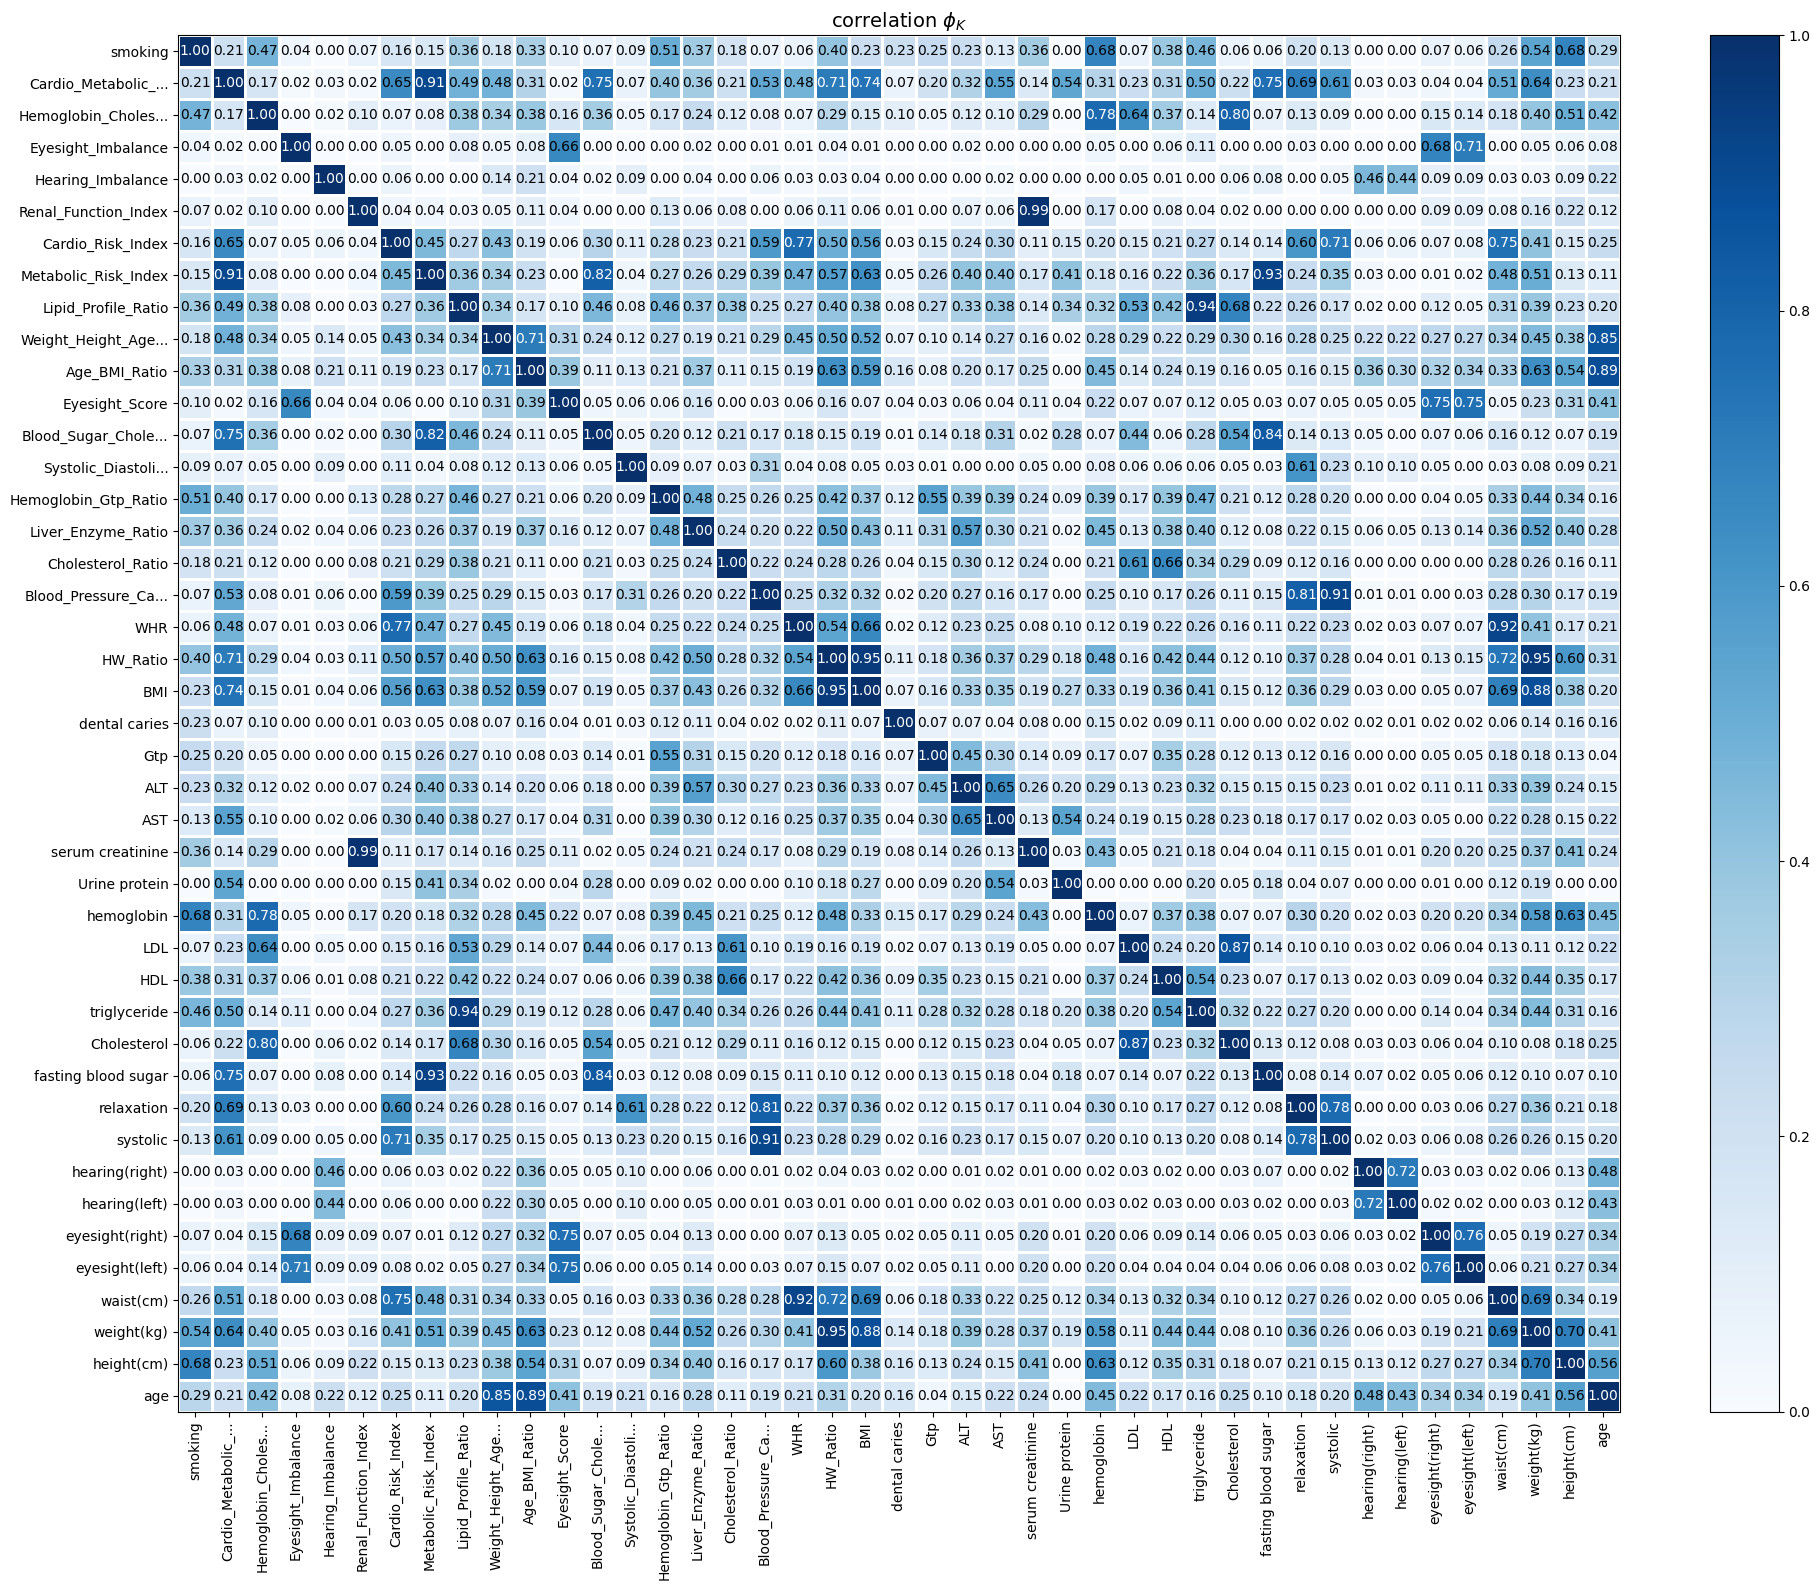

In [424]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(20,16))
plt.tight_layout()

In [425]:
global_correlation, global_labels = df1[df1.drop('smoking', axis=1).columns.tolist()+['smoking']].global_phik(interval_cols=intervals_cols)
for c, l in zip(global_correlation, global_labels):
    print(l, c[0])

age 1.0
height(cm) 0.42896774407539123
weight(kg) 0.9506462659649044
waist(cm) 1.0
eyesight(left) 0.8534150773649702
eyesight(right) 0.8203172886979019
hearing(left) 0.7333024583957455
hearing(right) 0.7476007181904922
systolic 1.0
relaxation 0.7733851770442334
fasting blood sugar 1.0
Cholesterol 1.0
triglyceride 1.0
HDL 1.0
LDL 1.0
hemoglobin 0.5788434298364046
Urine protein nan
serum creatinine 1.0
AST 0.7374460098969867
ALT 0.48030245171690206
Gtp 0.5986173684172255
dental caries 0.24888397516166846
BMI 1.0
HW_Ratio 0.9215324830338045
WHR 1.0
Blood_Pressure_Category 1.0
Cholesterol_Ratio 1.0
Liver_Enzyme_Ratio 0.6425028030982655
Hemoglobin_Gtp_Ratio 0.7604089705948778
Systolic_Diastolic_Ratio 0.6213308564312757
Blood_Sugar_Cholesterol_Index 1.0
Eyesight_Score 0.8347542783131978
Age_BMI_Ratio 0.6559213607466012
Weight_Height_Age_Index 0.3299863762275745
Lipid_Profile_Ratio 1.0
Metabolic_Risk_Index 1.0
Cardio_Risk_Index 1.0
Renal_Function_Index 1.0
Hearing_Imbalance 0.3643641286366127

c:\Python\Lib\site-packages\phik\phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


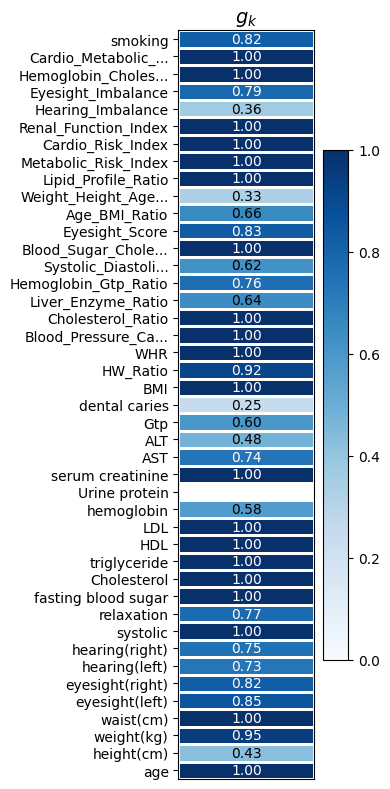

In [428]:
plot_correlation_matrix(global_correlation, x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(4,8),
                        color_map='Blues', title=r'$g_k$',
                        fontsize_factor=1)
plt.tight_layout()

In [321]:
df1.columns.tolist()

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'hearing(left)',
 'hearing(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'Urine protein',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'dental caries',
 'smoking']

In [429]:
significance_overview = df1[df1.drop('smoking', axis=1).columns.tolist()+['smoking']].significance_matrix(interval_cols=intervals_cols)

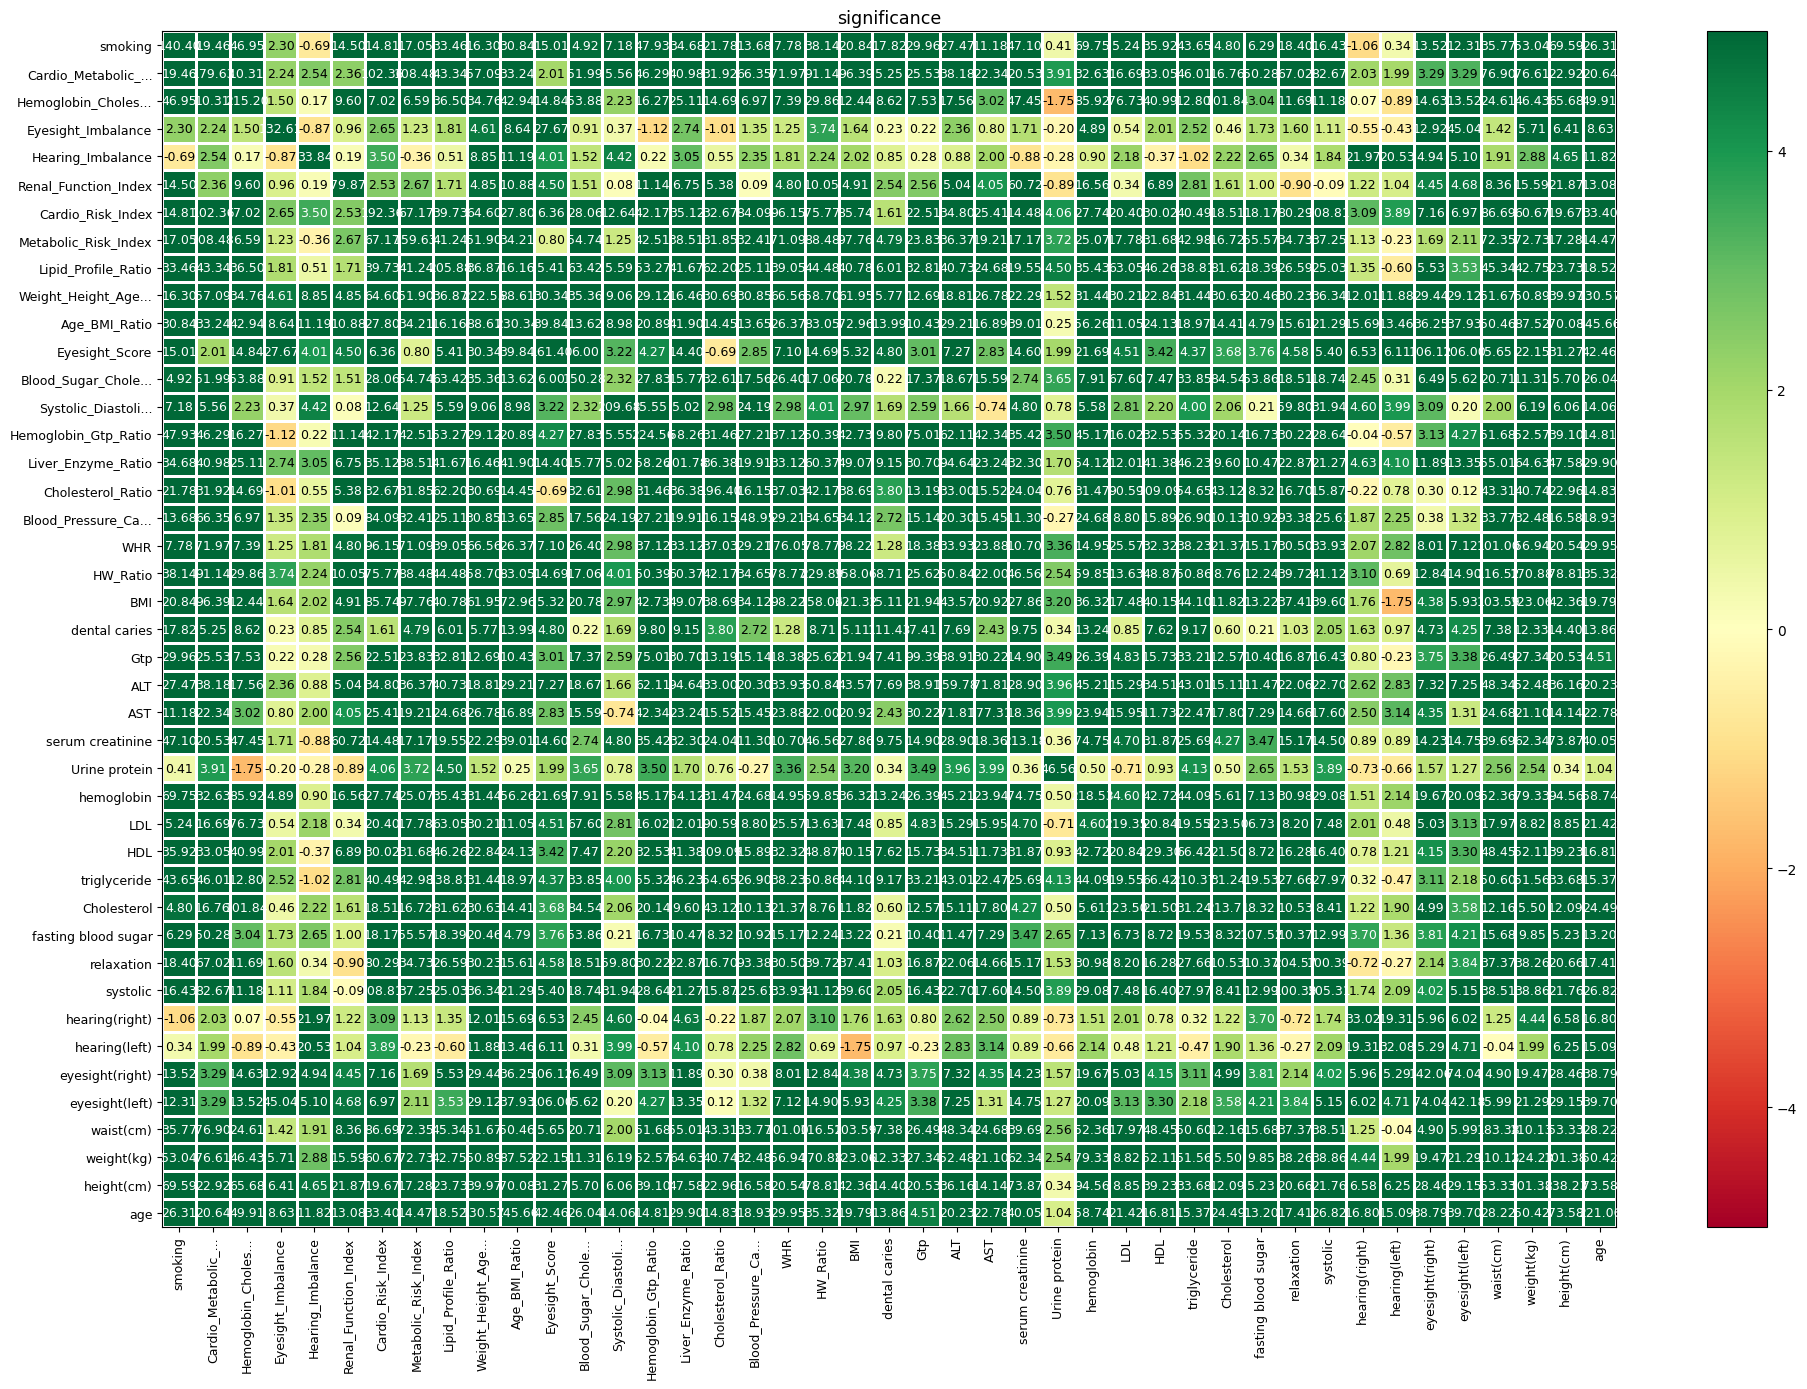

In [433]:
plot_correlation_matrix(significance_overview.fillna(0).values, x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, vmin=-5, vmax=5, title='significance', 
                        usetex=False, fontsize_factor=0.9, figsize=(20,14))
plt.tight_layout()

# Feature Engineering

In [353]:
train.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                             
0   55.0       170.0        80.0       92.0             1.2              0.8   
1   30.0       170.0        80.0       94.0             1.5              1.5   
2   45.0       170.0        75.0       84.0             1.0              1.0   
3   55.0       150.0        55.0       85.0             0.9              0.5   
4   45.0       160.0        55.0       72.0             0.5              0.6   

    hearing(left)  hearing(right)  systolic  relaxation  ...   HDL    LDL  \
id                                                       ...                
0             1.0             1.0     129.0        74.0  ...  49.0  114.0   
1             1.0             1.0     128.0        84.0  ...  51.0  111.0   
2             1.0             1.0     124.0        80.0  ...  52.0  112.0   
3             1.0             1.0     123.0        79.0  ...  61.0  119.0   
4             1.0             1.0     117.0        76.0  ...  61.0  120.0   

    hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp  \
id                                                                  
0         15.4            1.0               0.9  20.0  23.0  13.0   
1         16.2            1.0               0.9  30.0  39.0  92.0   
2         14.6            2.0               0.9  20.0  20.0  50.0   
3         13.4            1.0               0.8  25.0  20.0  18.0   
4         13.9            1.0               0.7  20.0  26.0  10.0   

    dental caries  smoking  
id                          
0             0.0      0.0  
1             0.0      1.0  
2             0.0      1.0  
3             0.0      0.0  
4             0.0      0.0  

[5 rows x 23 columns]

In [352]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [398]:
df = train.copy()
df1 = train.copy()

## Creating new Columns

In [395]:
import pandas as pd

def add_new_features(df):
    # 1. BMI (Body Mass Index)
    df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)
    
    # 2. HW_Ratio (Height to Weight Ratio)
    df['HW_Ratio'] = df['height(cm)'] / df['weight(kg)']
    
    # 3. WHR (Waist to Height Ratio)
    df['WHR'] = df['waist(cm)'] / df['height(cm)']
    
    # 4. Blood Pressure Category
    def categorize_blood_pressure(row):
        if row['systolic'] < 90 or row['relaxation'] < 60:
            return 'Low'
        elif 90 <= row['systolic'] < 120 and 60 <= row['relaxation'] < 80:
            return 'Normal'
        else:
            return 'High'

    df['Blood_Pressure_Category'] = df.apply(categorize_blood_pressure, axis=1)
    
    # 5. Cholesterol_Ratio (HDL to LDL Ratio)
    df['Cholesterol_Ratio'] = df['HDL'] / df['LDL']
    
    # 6. Liver_Enzyme_Ratio (AST to ALT Ratio)
    df['Liver_Enzyme_Ratio'] = df['AST'] / df['ALT']
    
    # 7. Hemoglobin_Gtp_Ratio
    df['Hemoglobin_Gtp_Ratio'] = df['hemoglobin'] / df['Gtp']
    
    # 8. Systolic_Diastolic_Ratio
    df['Systolic_Diastolic_Ratio'] = df['systolic'] / df['relaxation']
    
    # 9. Blood_Sugar_Cholesterol_Index
    df['Blood_Sugar_Cholesterol_Index'] = df['fasting blood sugar'] * df['Cholesterol']
    
    # 10. Eyesight_Score
    df['Eyesight_Score'] = df['eyesight(left)'] + df['eyesight(right)']
    
    return df


In [396]:
def add_advanced_features(df):
    # 1. Age_BMI_Ratio
    df['Age_BMI_Ratio'] = df['age'] / df['BMI']
    
    # 2. Weight_Height_Age_Index
    df['Weight_Height_Age_Index'] = (df['weight(kg)'] * df['age']) / df['height(cm)']
    
    # 3. Lipid_Profile_Ratio
    df['Lipid_Profile_Ratio'] = df['Cholesterol'] + df['triglyceride']
    
    # 4. Metabolic_Risk_Index
    df['Metabolic_Risk_Index'] = df['fasting blood sugar'] * df['BMI']
    
    # 5. Cardio_Risk_Index
    df['Cardio_Risk_Index'] = df['systolic'] * df['WHR']
    
    # 6. Renal_Function_Index
    df['Renal_Function_Index'] = df['hemoglobin'] / df['serum creatinine']
    
    # 7. Hearing_Imbalance
    df['Hearing_Imbalance'] = df['hearing(left)'] - df['hearing(right)']
    
    # 8. Eyesight_Imbalance
    df['Eyesight_Imbalance'] = df['eyesight(left)'] - df['eyesight(right)']
    
    # 9. Hemoglobin_Cholesterol_Ratio
    df['Hemoglobin_Cholesterol_Ratio'] = df['hemoglobin'] / df['Cholesterol']
    
    # 10. Cardio_Metabolic_Index
    df['Cardio_Metabolic_Index'] = df['systolic'] * df['fasting blood sugar'] * df['BMI']
    
    return df


In [397]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encode_categories(df, columns):
    # Создаем экземпляр OrdinalEncoder
    encoder = OrdinalEncoder()
    
    # Применяем OrdinalEncoder ко всем указанным столбцам
    df[columns] = encoder.fit_transform(df[columns])
    
    return df


In [399]:
df1 = add_new_features(df1)
df1 = add_advanced_features(df1)


In [400]:
df= df1.copy()
df = ordinal_encode_categories(df, ["Blood_Pressure_Category"])

In [586]:
def process_dataframe(df):
    # Добавляем новые признаки
    df = add_new_features(df)
    
    # Добавляем дополнительные признаки
    df = add_advanced_features(df)
    
    # Кодируем категориальные признаки
    df = ordinal_encode_categories(df, ["Blood_Pressure_Category"])
    
    return df

In [577]:
df.nunique()

age                                 14
height(cm)                          11
weight(kg)                          16
waist(cm)                          356
eyesight(left)                      14
eyesight(right)                     15
hearing(left)                        2
hearing(right)                       2
systolic                            77
relaxation                          59
fasting blood sugar                111
Cholesterol                        148
triglyceride                       314
HDL                                 74
LDL                                139
hemoglobin                         105
Urine protein                        5
serum creatinine                    13
AST                                 58
ALT                                 96
Gtp                                162
dental caries                        2
smoking                              2
BMI                                101
HW_Ratio                            92
WHR                      

## WoE

In [435]:
def WoE(data, feature_name, target_name):
    df = data.copy()
    woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0:'# of non-events'})
    woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
    woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    # woe_table['Rank'] = woe_table['WoE'].rank()
    
    return woe_table

In [436]:
def WoE_v2(data, feature_name, target_name):
    df = data.copy()
    
    # Group by the feature and calculate the count of events and non-events
    woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})
    
    # Calculate percentages
    woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
    woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    
    # Calculate WoE
    woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    
    # Add total observations and their percentage
    woe_table['Total Observations'] = woe_table['# of events'] + woe_table['# of non-events']
    woe_table['Percent of Observations'] = (woe_table['Total Observations'] / woe_table['Total Observations'].sum() * 100).round(3)

    return woe_table.reset_index()

In [437]:
def plot_woe(df, col_name,  x_axis_rotation):
    df_woe = df.copy()
    plt.grid()
    sns.scatterplot(data = df_woe, x=col_name, y='WoE')
    sns.lineplot(data=df_woe, x=col_name, y='WoE', color='red', linewidth=2)
    plt.xticks(rotation=x_axis_rotation)
    plt.show()


In [438]:
df1

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
id                                                               
0      55.0       170.0        80.0       92.0             1.2   
1      30.0       170.0        80.0       94.0             1.5   
2      45.0       170.0        75.0       84.0             1.0   
3      55.0       150.0        55.0       85.0             0.9   
4      45.0       160.0        55.0       72.0             0.5   
...     ...         ...         ...        ...             ...   
14995  40.0       170.0        70.0       81.0             1.0   
14996  40.0       155.0        50.0       75.0             1.0   
14997  45.0       160.0        55.0       81.0             1.2   
14998  50.0       160.0        60.0       80.0             0.7   
14999  55.0       175.0        75.0       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
id                                                                            
0                  0.8            1.0             1.0     129.0        74.0   
1                  1.5            1.0             1.0     128.0        84.0   
2                  1.0            1.0             1.0     124.0        80.0   
3                  0.5            1.0             1.0     123.0        79.0   
4                  0.6            1.0             1.0     117.0        76.0   
...                ...            ...             ...       ...         ...   
14995              1.0            1.0             1.0     130.0        79.0   
14996              1.2            1.0             1.0     100.0        60.0   
14997              0.8            1.0             1.0     100.0        60.0   
14998              1.0            1.0             1.0     120.0        80.0   
14999              0.8            1.0             1.0     141.0        83.0   

       ...  Age_BMI_Ratio  Weight_Height_Age_Index  Lipid_Profile_Ratio  \
id     ...                                                                
0      ...       1.986875                25.882353                233.0   
1      ...       1.083750                14.117647                316.0   
2      ...       1.734000                19.852941                330.0   
3      ...       2.250000                20.166667                258.0   
4      ...       2.094545                15.468750                278.0   
...    ...            ...                      ...                  ...   
14995  ...       1.651429                16.470588                314.0   
14996  ...       1.922000                12.903226                228.0   
14997  ...       2.094545                15.468750                218.0   
14998  ...       2.133333                18.750000                355.0   
14999  ...       2.245833                23.571429                298.0   

       Metabolic_Risk_Index  Cardio_Risk_Index  Renal_Function_Index  \
id                                                                     
0               2269.896194          69.811765             17.111111   
1               2629.757785          70.776471             18.000000   
2               2543.252595          61.270588             16.222222   
3               2322.222222          69.700000             16.750000   
4               2212.890625          52.650000             19.857143   
...                     ...                ...                   ...   
14995           2204.152249          61.941176             17.555556   
14996           1727.367326          48.387097             17.625000   
14997           1955.078125          50.625000             18.000000   
14998           2109.375000          60.000000             16.111111   
14999           2644.897959          68.485714             15.111111   

       Hearing_Imbalance  Eyesight_Imbalance  Hemoglobin_Cholesterol_Ratio  \
id                                                                           
0                    0.0                 0.4        

### Age_Cat

In [456]:
df3 = df1.copy()
df3['Age_Cat'] = pd.qcut(df3['age'], q=5)
# df3['Age_Cat'] = pd.cut(df3['Age'], bins=10)
df3

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
id                                                               
0      55.0       170.0        80.0       92.0             1.2   
1      30.0       170.0        80.0       94.0             1.5   
2      45.0       170.0        75.0       84.0             1.0   
3      55.0       150.0        55.0       85.0             0.9   
4      45.0       160.0        55.0       72.0             0.5   
...     ...         ...         ...        ...             ...   
14995  40.0       170.0        70.0       81.0             1.0   
14996  40.0       155.0        50.0       75.0             1.0   
14997  45.0       160.0        55.0       81.0             1.2   
14998  50.0       160.0        60.0       80.0             0.7   
14999  55.0       175.0        75.0       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
id                                                                            
0                  0.8            1.0             1.0     129.0        74.0   
1                  1.5            1.0             1.0     128.0        84.0   
2                  1.0            1.0             1.0     124.0        80.0   
3                  0.5            1.0             1.0     123.0        79.0   
4                  0.6            1.0             1.0     117.0        76.0   
...                ...            ...             ...       ...         ...   
14995              1.0            1.0             1.0     130.0        79.0   
14996              1.2            1.0             1.0     100.0        60.0   
14997              0.8            1.0             1.0     100.0        60.0   
14998              1.0            1.0             1.0     120.0        80.0   
14999              0.8            1.0             1.0     141.0        83.0   

       ...  Weight_Height_Age_Index  Lipid_Profile_Ratio  \
id     ...                                                 
0      ...                25.882353                233.0   
1      ...                14.117647                316.0   
2      ...                19.852941                330.0   
3      ...                20.166667                258.0   
4      ...                15.468750                278.0   
...    ...                      ...                  ...   
14995  ...                16.470588                314.0   
14996  ...                12.903226                228.0   
14997  ...                15.468750                218.0   
14998  ...                18.750000                355.0   
14999  ...                23.571429                298.0   

       Metabolic_Risk_Index  Cardio_Risk_Index  Renal_Function_Index  \
id                                                                     
0               2269.896194          69.811765             17.111111   
1               2629.757785          70.776471             18.000000   
2               2543.252595          61.270588             16.222222   
3               2322.222222          69.700000             16.750000   
4               2212.890625          52.650000             19.857143   
...                     ...                ...                   ...   
14995           2204.152249          61.941176             17.555556   
14996           1727.367326          48.387097             17.625000   
14997           1955.078125          50.625000             18.000000   
14998           2109.375000          60.000000             16.111111   
14999           2644.897959          68.485714             15.111111   

       Hearing_Imbalance  Eyesight_Imbalance  Hemoglobin_Cholesterol_Ratio  \
id                                                                           
0                    0.0                 0.4                      0.088000   
1                    0.0                 0.0                      0.086170   
2                    0.0                 0.0                      0.076042   
3            

In [457]:
df_woe = WoE_v2(df3, 'Age_Cat', 'smoking')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_19192\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


smoking         Age_Cat  # of non-events  # of events  Percentage events  \
0        (19.999, 35.0]             1594         1918           0.346397   
1          (35.0, 40.0]             3541         1936           0.349648   
2          (40.0, 45.0]             1246          579           0.104569   
3          (45.0, 50.0]              934          411           0.074228   
4          (50.0, 85.0]             2148          693           0.125158   

smoking  Percentage non-events       WoE  Total Observations  \
0                     0.168446  0.720973                3512   
1                     0.374194 -0.067849                5477   
2                     0.131671 -0.230455                1825   
3                     0.098700 -0.284947                1345   
4                     0.226989 -0.595326                2841   

smoking  Percent of Observations  
0                         23.413  
1                         36.513  
2                         12.167  
3                          8.967  
4                         18.940

In [458]:
df3['Age_Cat'].value_counts(normalize=True).sort_index()*100

Age_Cat
(19.999, 35.0]    23.413333
(35.0, 40.0]      36.513333
(40.0, 45.0]      12.166667
(45.0, 50.0]       8.966667
(50.0, 85.0]      18.940000
Name: proportion, dtype: float64

smoking         Age_Cat  # of non-events  # of events  Percentage events  \
0        (19.999, 35.0]             1594         1918           0.346397   
1          (35.0, 40.0]             3541         1936           0.349648   
2          (40.0, 45.0]             1246          579           0.104569   
3          (45.0, 50.0]              934          411           0.074228   
4          (50.0, 85.0]             2148          693           0.125158   

smoking  Percentage non-events       WoE  Total Observations  \
0                     0.168446  0.720973                3512   
1                     0.374194 -0.067849                5477   
2                     0.131671 -0.230455                1825   
3                     0.098700 -0.284947                1345   
4                     0.226989 -0.595326                2841   

smoking  Percent of Observations  
0                         23.413  
1                         36.513  
2                         12.167  
3                          8.967  
4                         18.940

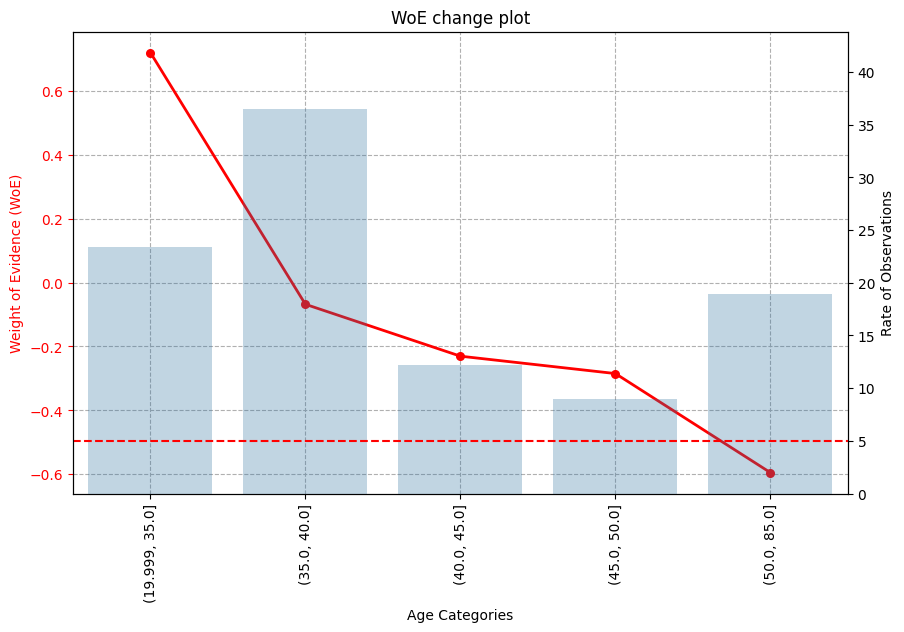

In [459]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='Age_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Age Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='Age_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

In [460]:
ordinal_encoder = OrdinalEncoder()
df3['Age_Cat'] = ordinal_encoder.fit_transform(df3[['Age_Cat']])
df3.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                             
0   55.0       170.0        80.0       92.0             1.2              0.8   
1   30.0       170.0        80.0       94.0             1.5              1.5   
2   45.0       170.0        75.0       84.0             1.0              1.0   
3   55.0       150.0        55.0       85.0             0.9              0.5   
4   45.0       160.0        55.0       72.0             0.5              0.6   

    hearing(left)  hearing(right)  systolic  relaxation  ...  \
id                                                       ...   
0             1.0             1.0     129.0        74.0  ...   
1             1.0             1.0     128.0        84.0  ...   
2             1.0             1.0     124.0        80.0  ...   
3             1.0             1.0     123.0        79.0  ...   
4             1.0             1.0     117.0        76.0  ...   

    Weight_Height_Age_Index  Lipid_Profile_Ratio  Metabolic_Risk_Index  \
id                                                                       
0                 25.882353                233.0           2269.896194   
1                 14.117647                316.0           2629.757785   
2                 19.852941                330.0           2543.252595   
3                 20.166667                258.0           2322.222222   
4                 15.468750                278.0           2212.890625   

    Cardio_Risk_Index  Renal_Function_Index  Hearing_Imbalance  \
id                                                               
0           69.811765             17.111111                0.0   
1           70.776471             18.000000                0.0   
2           61.270588             16.222222                0.0   
3           69.700000             16.750000                0.0   
4           52.650000             19.857143                0.0   

    Eyesight_Imbalance  Hemoglobin_Cholesterol_Ratio  Cardio_Metabolic_Index  \
id                                                                             
0                  0.4                      0.088000           292816.608997   
1                  0.0                      0.086170           336608.996540   
2                  0.0                      0.076042           315363.321799   
3                  0.4                      0.069430           285633.333333   
4                 -0.1                      0.070558           258908.203125   

    Age_Cat  
id           
0       4.0  
1       0.0  
2       2.0  
3       4.0  
4       2.0  

[5 rows x 44 columns]

### Waist_Cat

In [481]:
df3 = df1.copy()
df3['Waist_Cat'] = pd.qcut(df3['waist(cm)'], q=5)
# df3['CreditScore_Cat'] = pd.cut(df3['CreditScore'], bins=10)
df3

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
id                                                               
0      55.0       170.0        80.0       92.0             1.2   
1      30.0       170.0        80.0       94.0             1.5   
2      45.0       170.0        75.0       84.0             1.0   
3      55.0       150.0        55.0       85.0             0.9   
4      45.0       160.0        55.0       72.0             0.5   
...     ...         ...         ...        ...             ...   
14995  40.0       170.0        70.0       81.0             1.0   
14996  40.0       155.0        50.0       75.0             1.0   
14997  45.0       160.0        55.0       81.0             1.2   
14998  50.0       160.0        60.0       80.0             0.7   
14999  55.0       175.0        75.0       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
id                                                                            
0                  0.8            1.0             1.0     129.0        74.0   
1                  1.5            1.0             1.0     128.0        84.0   
2                  1.0            1.0             1.0     124.0        80.0   
3                  0.5            1.0             1.0     123.0        79.0   
4                  0.6            1.0             1.0     117.0        76.0   
...                ...            ...             ...       ...         ...   
14995              1.0            1.0             1.0     130.0        79.0   
14996              1.2            1.0             1.0     100.0        60.0   
14997              0.8            1.0             1.0     100.0        60.0   
14998              1.0            1.0             1.0     120.0        80.0   
14999              0.8            1.0             1.0     141.0        83.0   

       ...  Weight_Height_Age_Index  Lipid_Profile_Ratio  \
id     ...                                                 
0      ...                25.882353                233.0   
1      ...                14.117647                316.0   
2      ...                19.852941                330.0   
3      ...                20.166667                258.0   
4      ...                15.468750                278.0   
...    ...                      ...                  ...   
14995  ...                16.470588                314.0   
14996  ...                12.903226                228.0   
14997  ...                15.468750                218.0   
14998  ...                18.750000                355.0   
14999  ...                23.571429                298.0   

       Metabolic_Risk_Index  Cardio_Risk_Index  Renal_Function_Index  \
id                                                                     
0               2269.896194          69.811765             17.111111   
1               2629.757785          70.776471             18.000000   
2               2543.252595          61.270588             16.222222   
3               2322.222222          69.700000             16.750000   
4               2212.890625          52.650000             19.857143   
...                     ...                ...                   ...   
14995           2204.152249          61.941176             17.555556   
14996           1727.367326          48.387097             17.625000   
14997           1955.078125          50.625000             18.000000   
14998           2109.375000          60.000000             16.111111   
14999           2644.897959          68.485714             15.111111   

       Hearing_Imbalance  Eyesight_Imbalance  Hemoglobin_Cholesterol_Ratio  \
id                                                                           
0                    0.0                 0.4                      0.088000   
1                    0.0                 0.0                      0.086170   
2                    0.0                 0.0                      0.076042   
3            

In [482]:
df_woe = WoE_v2(df3, 'Waist_Cat', 'smoking')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_19192\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


smoking      Waist_Cat  # of non-events  # of events  Percentage events  \
0        (0.999, 73.0]             2633          411           0.074228   
1         (73.0, 78.0]             2191          885           0.159834   
2         (78.0, 82.0]             1796         1247           0.225212   
3         (82.0, 87.0]             1655         1519           0.274336   
4        (87.0, 117.0]             1188         1475           0.266390   

smoking  Percentage non-events       WoE  Total Observations  \
0                     0.278242 -1.321349                3044   
1                     0.231533 -0.370589                3076   
2                     0.189792  0.171115                3043   
3                     0.174892  0.450188                3174   
4                     0.125542  0.752323                2663   

smoking  Percent of Observations  
0                         20.293  
1                         20.507  
2                         20.287  
3                         21.160  
4                         17.753

In [483]:
df3['Waist_Cat'].value_counts(normalize=True).sort_index()*100

Waist_Cat
(0.999, 73.0]    20.293333
(73.0, 78.0]     20.506667
(78.0, 82.0]     20.286667
(82.0, 87.0]     21.160000
(87.0, 117.0]    17.753333
Name: proportion, dtype: float64

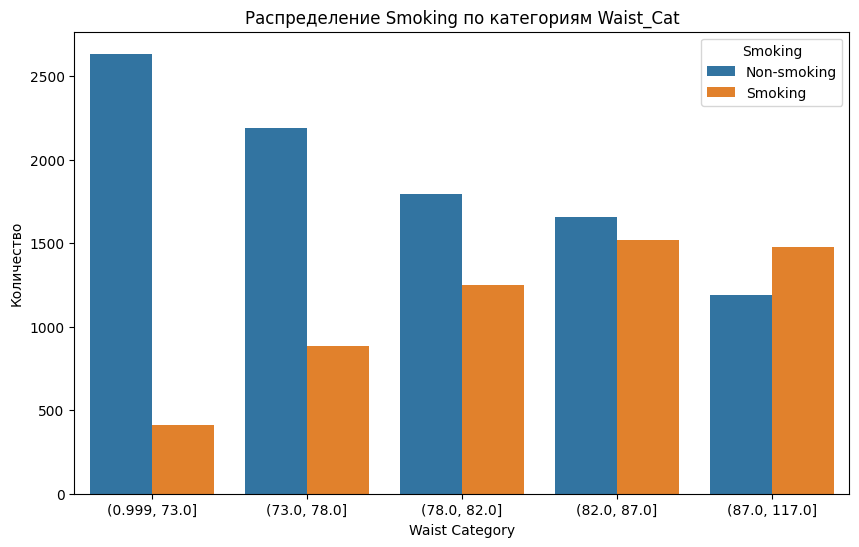

In [484]:
import seaborn as sns

# Построение графика
plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='Waist_Cat', hue='smoking')

# Настройка графика
plt.title('Распределение Smoking по категориям Waist_Cat')
plt.xlabel('Waist Category')
plt.ylabel('Количество')
plt.legend(title='Smoking', labels=['Non-smoking', 'Smoking'])

plt.show()


smoking      Waist_Cat  # of non-events  # of events  Percentage events  \
0        (0.999, 73.0]             2633          411           0.074228   
1         (73.0, 78.0]             2191          885           0.159834   
2         (78.0, 82.0]             1796         1247           0.225212   
3         (82.0, 87.0]             1655         1519           0.274336   
4        (87.0, 117.0]             1188         1475           0.266390   

smoking  Percentage non-events       WoE  Total Observations  \
0                     0.278242 -1.321349                3044   
1                     0.231533 -0.370589                3076   
2                     0.189792  0.171115                3043   
3                     0.174892  0.450188                3174   
4                     0.125542  0.752323                2663   

smoking  Percent of Observations  
0                         20.293  
1                         20.507  
2                         20.287  
3                         21.160  
4                         17.753

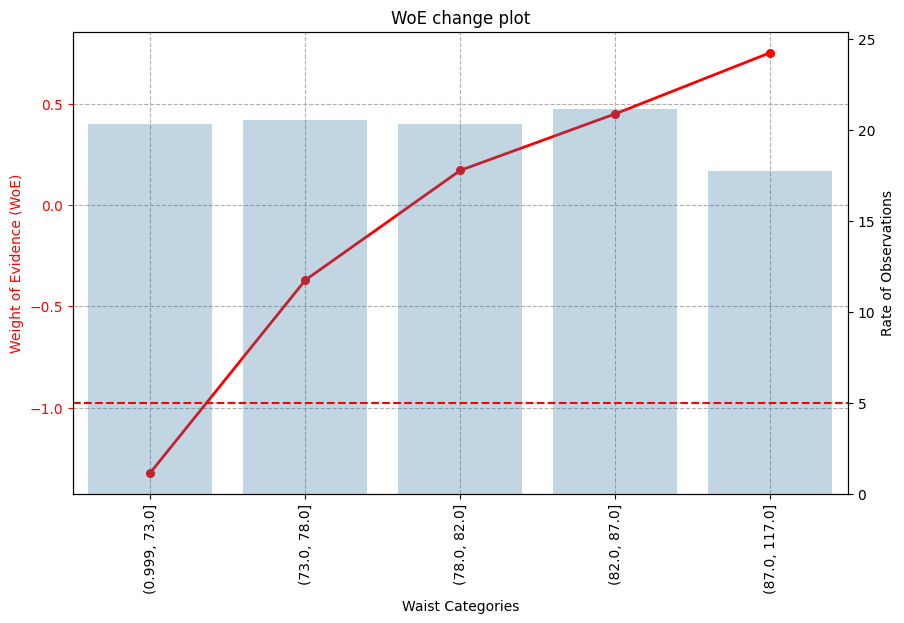

In [485]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='Waist_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Waist Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='Waist_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

### Cholesterol_Cat

<Axes: >

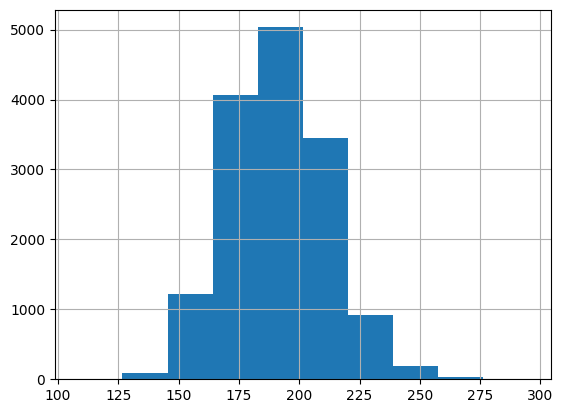

In [504]:
df1['Cholesterol'].hist()

In [526]:
df3['Cholesterol_Cat'] = pd.cut(df3['Cholesterol'], bins=[107, 200, 296])
df_woe = WoE_v2(df3, 'Cholesterol_Cat', 'smoking')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_19192\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


smoking Cholesterol_Cat  # of non-events  # of events  Percentage events  \
0            (107, 200]             6386         3781           0.682861   
1            (200, 296]             3077         1756           0.317139   

smoking  Percentage non-events       WoE  Total Observations  \
0                     0.674839  0.011817               10167   
1                     0.325161 -0.024980                4833   

smoking  Percent of Observations  
0                          67.78  
1                          32.22

smoking Cholesterol_Cat  # of non-events  # of events  Percentage events  \
0            (107, 200]             6386         3781           0.682861   
1            (200, 296]             3077         1756           0.317139   

smoking  Percentage non-events       WoE  Total Observations  \
0                     0.674839  0.011817               10167   
1                     0.325161 -0.024980                4833   

smoking  Percent of Observations  
0                          67.78  
1                          32.22

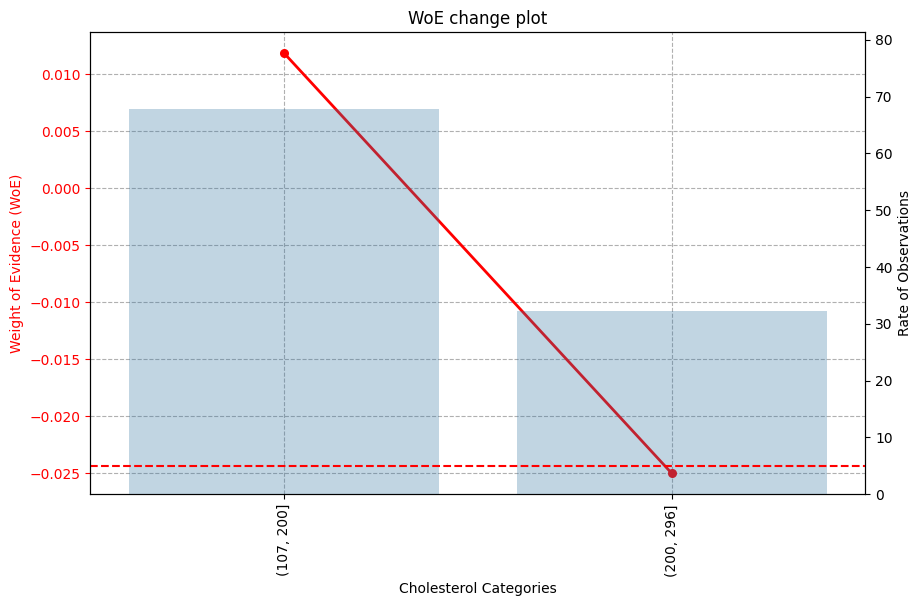

In [527]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='Cholesterol_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('Cholesterol Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='Cholesterol_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

In [528]:
df3['Cholesterol_Cat'] = pd.cut(df3['Cholesterol'], bins=[107, 200, 296])
ordinal_encoder = OrdinalEncoder()
df3['Cholesterol_Cat'] = ordinal_encoder.fit_transform(df3[['Cholesterol_Cat']])
df3.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
id                                                                             
0   55.0       170.0        80.0       92.0             1.2              0.8   
1   30.0       170.0        80.0       94.0             1.5              1.5   
2   45.0       170.0        75.0       84.0             1.0              1.0   
3   55.0       150.0        55.0       85.0             0.9              0.5   
4   45.0       160.0        55.0       72.0             0.5              0.6   

    hearing(left)  hearing(right)  systolic  relaxation  ...  \
id                                                       ...   
0             1.0             1.0     129.0        74.0  ...   
1             1.0             1.0     128.0        84.0  ...   
2             1.0             1.0     124.0        80.0  ...   
3             1.0             1.0     123.0        79.0  ...   
4             1.0             1.0     117.0        76.0  ...   

    Lipid_Profile_Ratio  Metabolic_Risk_Index  Cardio_Risk_Index  \
id                                                                 
0                 233.0           2269.896194          69.811765   
1                 316.0           2629.757785          70.776471   
2                 330.0           2543.252595          61.270588   
3                 258.0           2322.222222          69.700000   
4                 278.0           2212.890625          52.650000   

    Renal_Function_Index  Hearing_Imbalance  Eyesight_Imbalance  \
id                                                                
0              17.111111                0.0                 0.4   
1              18.000000                0.0                 0.0   
2              16.222222                0.0                 0.0   
3              16.750000                0.0                 0.4   
4              19.857143                0.0                -0.1   

    Hemoglobin_Cholesterol_Ratio  Cardio_Metabolic_Index  Balance_Cat  \
id                                                                      
0                       0.088000           292816.608997   (107, 200]   
1                       0.086170           336608.996540   (107, 200]   
2                       0.076042           315363.321799   (107, 200]   
3                       0.069430           285633.333333   (107, 200]   
4                       0.070558           258908.203125   (107, 200]   

    Cholesterol_Cat  
id                   
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 45 columns]

### triglyceride_Cat

<Axes: >

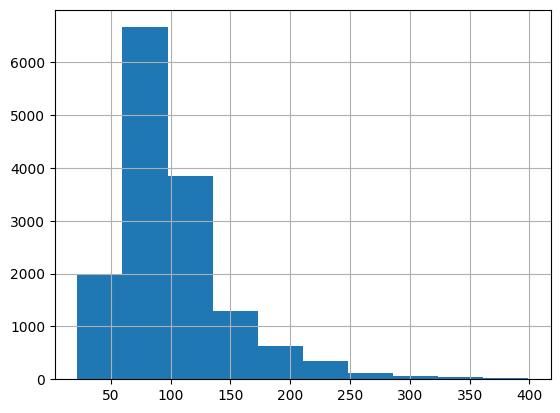

In [532]:
df1['triglyceride'].hist()

In [574]:
df3 = df1.copy()
df3['triglyceride_Cat'] = pd.qcut(df3['triglyceride'], q=5)
df3

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
id                                                               
0      55.0       170.0        80.0       92.0             1.2   
1      30.0       170.0        80.0       94.0             1.5   
2      45.0       170.0        75.0       84.0             1.0   
3      55.0       150.0        55.0       85.0             0.9   
4      45.0       160.0        55.0       72.0             0.5   
...     ...         ...         ...        ...             ...   
14995  40.0       170.0        70.0       81.0             1.0   
14996  40.0       155.0        50.0       75.0             1.0   
14997  45.0       160.0        55.0       81.0             1.2   
14998  50.0       160.0        60.0       80.0             0.7   
14999  55.0       175.0        75.0       85.0             0.9   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
id                                                                            
0                  0.8            1.0             1.0     129.0        74.0   
1                  1.5            1.0             1.0     128.0        84.0   
2                  1.0            1.0             1.0     124.0        80.0   
3                  0.5            1.0             1.0     123.0        79.0   
4                  0.6            1.0             1.0     117.0        76.0   
...                ...            ...             ...       ...         ...   
14995              1.0            1.0             1.0     130.0        79.0   
14996              1.2            1.0             1.0     100.0        60.0   
14997              0.8            1.0             1.0     100.0        60.0   
14998              1.0            1.0             1.0     120.0        80.0   
14999              0.8            1.0             1.0     141.0        83.0   

       ...  Weight_Height_Age_Index  Lipid_Profile_Ratio  \
id     ...                                                 
0      ...                25.882353                233.0   
1      ...                14.117647                316.0   
2      ...                19.852941                330.0   
3      ...                20.166667                258.0   
4      ...                15.468750                278.0   
...    ...                      ...                  ...   
14995  ...                16.470588                314.0   
14996  ...                12.903226                228.0   
14997  ...                15.468750                218.0   
14998  ...                18.750000                355.0   
14999  ...                23.571429                298.0   

       Metabolic_Risk_Index  Cardio_Risk_Index  Renal_Function_Index  \
id                                                                     
0               2269.896194          69.811765             17.111111   
1               2629.757785          70.776471             18.000000   
2               2543.252595          61.270588             16.222222   
3               2322.222222          69.700000             16.750000   
4               2212.890625          52.650000             19.857143   
...                     ...                ...                   ...   
14995           2204.152249          61.941176             17.555556   
14996           1727.367326          48.387097             17.625000   
14997           1955.078125          50.625000             18.000000   
14998           2109.375000          60.000000             16.111111   
14999           2644.897959          68.485714             15.111111   

       Hearing_Imbalance  Eyesight_Imbalance  Hemoglobin_Cholesterol_Ratio  \
id                                                                           
0                    0.0                 0.4                      0.088000   
1                    0.0                 0.0                      0.086170   
2                    0.0                 0.0                      0.076042   
3            

In [548]:
df_woe = WoE_v2(df3, 'triglyceride_Cat', 'smoking')
df_woe

C:\Users\Rudy\AppData\Local\Temp\ipykernel_19192\3879646276.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  woe_table = df.groupby(feature_name)[target_name].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})


smoking triglyceride_Cat  # of non-events  # of events  Percentage events  \
0         (21.999, 66.0]             2620          432           0.078021   
1           (66.0, 82.0]             2320          740           0.133646   
2          (82.0, 101.0]             1972         1084           0.195774   
3         (101.0, 129.0]             1494         1385           0.250135   
4         (129.0, 399.0]             1057         1896           0.342424   

smoking  Percentage non-events       WoE  Total Observations  \
0                     0.276868 -1.266567                3052   
1                     0.245165 -0.606736                3060   
2                     0.208391 -0.062454                3056   
3                     0.157878  0.460180                2879   
4                     0.111698  1.120248                2953   

smoking  Percent of Observations  
0                         20.347  
1                         20.400  
2                         20.373  
3                         19.193  
4                         19.687

In [549]:
df3['triglyceride_Cat'].value_counts(normalize=True).sort_index()*100

triglyceride_Cat
(21.999, 66.0]    20.346667
(66.0, 82.0]      20.400000
(82.0, 101.0]     20.373333
(101.0, 129.0]    19.193333
(129.0, 399.0]    19.686667
Name: proportion, dtype: float64

smoking triglyceride_Cat  # of non-events  # of events  Percentage events  \
0         (21.999, 66.0]             2620          432           0.078021   
1           (66.0, 82.0]             2320          740           0.133646   
2          (82.0, 101.0]             1972         1084           0.195774   
3         (101.0, 129.0]             1494         1385           0.250135   
4         (129.0, 399.0]             1057         1896           0.342424   

smoking  Percentage non-events       WoE  Total Observations  \
0                     0.276868 -1.266567                3052   
1                     0.245165 -0.606736                3060   
2                     0.208391 -0.062454                3056   
3                     0.157878  0.460180                2879   
4                     0.111698  1.120248                2953   

smoking  Percent of Observations  
0                         20.347  
1                         20.400  
2                         20.373  
3                         19.193  
4                         19.687

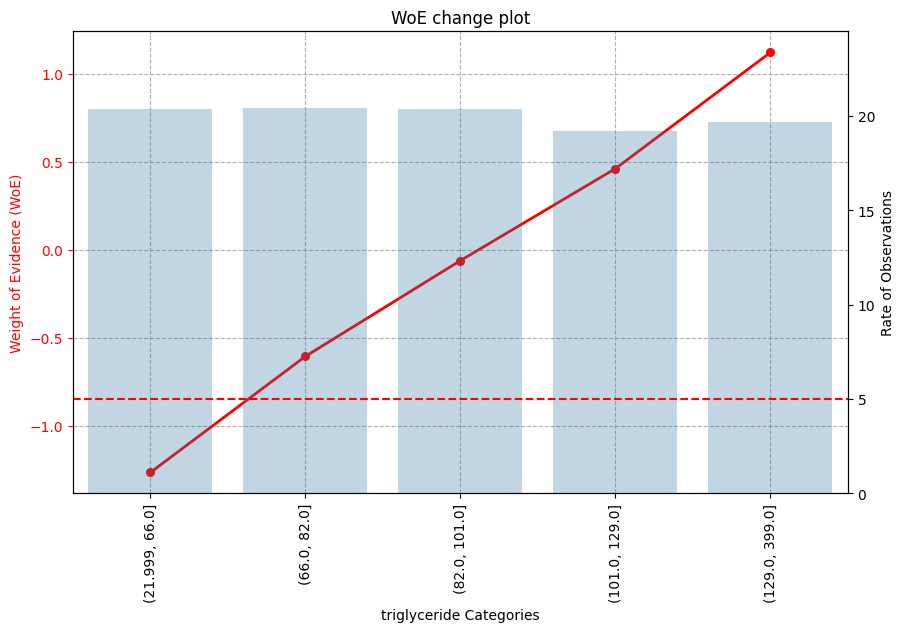

In [550]:
display(df_woe)

fig, ax1 = plt.subplots(figsize=(10, 6))  # Define a figure with an axis for the pointplot
ax2 = ax1.twinx()  # Create a secondary y-axis to plot the barplot

# Create the pointplot on the primary axis (ax1)
sns.pointplot(data=df_woe, x='triglyceride_Cat', y='WoE', color='red', linewidth=2, ax=ax1)
ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
ax1.tick_params(axis='y', colors='red')
ax1.set_xlabel('triglyceride Categories')
# plt.xticks(rotation=45)
# Set x-tick rotation directly on the x-axis for ax1
for label in ax1.get_xticklabels():
    label.set_rotation(90)
# Create the barplot on the secondary axis (ax2)
sns.barplot(data=df_woe, x='triglyceride_Cat', y='Percent of Observations', alpha=0.3, ax=ax2)
ax2.set_ylabel('Rate of Observations')
ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)  # Adjust y-limits if necessary
ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)
# Set up the grids and display the plot
ax1.grid(visible=True, which='major', linestyle='--')
plt.title("WoE change plot")
plt.show()

### Def

In [576]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

def WoE_create_and_encode_categories(df):
    # Initialize the OrdinalEncoder
    ordinal_encoder = OrdinalEncoder()

    # 1. Age_Cat: Create quantile-based categories for age and encode
    df['Age_Cat'] = pd.qcut(df['age'], q=5)
    df['Age_Cat'] = ordinal_encoder.fit_transform(df[['Age_Cat']])

    # 2. Waist_Cat: Create quantile-based categories for waist(cm) and encode
    df['Waist_Cat'] = pd.qcut(df['waist(cm)'], q=5)
    df['Waist_Cat'] = ordinal_encoder.fit_transform(df[['Waist_Cat']])

    # 3. Cholesterol_Cat: Create bins for Cholesterol and encode
    df['Cholesterol_Cat'] = pd.cut(df['Cholesterol'], bins=[107, 200, 296])
    df['Cholesterol_Cat'] = ordinal_encoder.fit_transform(df[['Cholesterol_Cat']])

    # 4. Triglyceride_Cat: Create quantile-based categories for triglyceride and encode
    df['triglyceride_Cat'] = pd.qcut(df['triglyceride'], q=5)
    df['triglyceride_Cat'] = ordinal_encoder.fit_transform(df[['triglyceride_Cat']])

    return df


# Creating Model in train dataset

c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

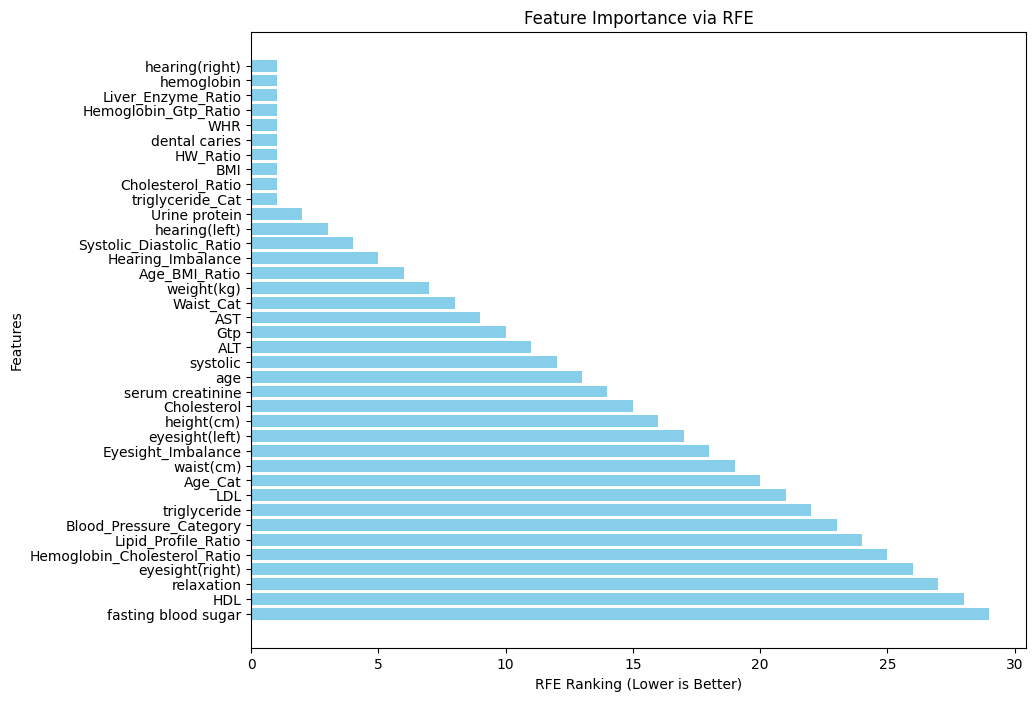

In [973]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

train = train1.copy()
train = process_dataframe(train)
train = WoE_create_and_encode_categories(train)

X = train.drop("smoking", axis=1)
y = train["smoking"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the estimator
model = LogisticRegression(random_state=42, max_iter=1000)

# Initialize RFE, specifying the number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE on the data
rfe.fit(X_train, y_train)

# Get feature rankings and selected features
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})

# Sort features by ranking (1 means selected)
feature_ranking = feature_ranking.sort_values(by='Ranking')

# Visualization of Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'], color="skyblue")
plt.xlabel("RFE Ranking (Lower is Better)")
plt.ylabel("Features")
plt.title("Feature Importance via RFE")
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()


In [974]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
import pandas as pd

# Initialize the estimator
model = LogisticRegression(random_state=42, max_iter=1000)

# Initialize RFE with the model and specify the number of features to select
# Here, we specify `n_features_to_select=5` as an example, but you can adjust this based on your needs
rfe = RFE(estimator=model, n_features_to_select=15)

# Fit RFE on the data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

# Transform X_train and X_test to only include the selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit the model using the selected features
model.fit(X_train_rfe, y_train)

# Calculate ROC-AUC scores for the training and test sets
train_proba = model.predict_proba(X_train_rfe)[:, 1]
test_proba = model.predict_proba(X_test_rfe)[:, 1]

train_auc = roc_auc_score(y_train, train_proba)
test_auc = roc_auc_score(y_test, test_proba)
auc_diff = train_auc - test_auc

# Display results
print(f"Training ROC AUC: {train_auc:.4f}")
print(f"Testing ROC AUC: {test_auc:.4f}")
print(f"Difference (Train - Test): {auc_diff:.4f}")


c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:

Selected features: Index(['hearing(left)', 'hearing(right)', 'hemoglobin', 'Urine protein',
       'dental caries', 'BMI', 'HW_Ratio', 'WHR', 'Cholesterol_Ratio',
       'Liver_Enzyme_Ratio', 'Hemoglobin_Gtp_Ratio',
       'Systolic_Diastolic_Ratio', 'Age_BMI_Ratio', 'Hearing_Imbalance',
       'triglyceride_Cat'],
      dtype='object')
Training ROC AUC: 0.8654
Testing ROC AUC: 0.8642
Difference (Train - Test): 0.0012


In [1067]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

def add_new_features(df):
    # 1. BMI (Body Mass Index)
    df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)
    
    # 2. HW_Ratio (Height to Weight Ratio)
    # 3. WHR (Waist to Height Ratio)
    df['WHR'] = df['waist(cm)'] / df['height(cm)']
    
    # 4. Blood Pressure Category
    def categorize_blood_pressure(row):
        if row['systolic'] < 90 or row['relaxation'] < 60:
            return 'Low'
        elif 90 <= row['systolic'] < 120 and 60 <= row['relaxation'] < 80:
            return 'Normal'
        else:
            return 'High'

    df['Blood_Pressure_Category'] = df.apply(categorize_blood_pressure, axis=1)
    
    # 5. Cholesterol_Ratio (HDL to LDL Ratio)
    df['Cholesterol_Ratio'] = df['HDL'] / df['LDL']
    
    # 6. Liver_Enzyme_Ratio (AST to ALT Ratio)
    df['Liver_Enzyme_Ratio'] = df['AST'] / df['ALT']
    
    # 7. Hemoglobin_Gtp_Ratio
    df['Hemoglobin_Gtp_Ratio'] = df['hemoglobin'] / df['Gtp']
    
    # 8. Systolic_Diastolic_Ratio
    df['Systolic_Diastolic_Ratio'] = df['systolic'] / df['relaxation']
    
    # 9. Blood_Sugar_Cholesterol_Index
    
    return df

def add_advanced_features(df):
    # 1. Age_BMI_Ratio
    
    # 3. Lipid_Profile_Ratio
    
    ### 7. Hearing_Imbalance
    df['Hearing_Imbalance'] = df['hearing(left)'] - df['hearing(right)']
    
    # 8. Eyesight_Imbalance
    df['Eyesight_Imbalance'] = df['eyesight(left)'] - df['eyesight(right)']
    
    ### 9. Hemoglobin_Cholesterol_Ratio
    
    return df

from sklearn.preprocessing import OrdinalEncoder

def ordinal_encode_categories(df, columns):
    # Создаем экземпляр OrdinalEncoder
    encoder = OrdinalEncoder()
    
    # Применяем OrdinalEncoder ко всем указанным столбцам
    df[columns] = encoder.fit_transform(df[columns])
    
    return df
def process_dataframe(df):
    # Добавляем новые признаки
    df = add_new_features(df)
    
    # Добавляем дополнительные признаки
    df = add_advanced_features(df)
    
    # Кодируем категориальные признаки
    df = ordinal_encode_categories(df, ["Blood_Pressure_Category"])
    
    return df

def WoE_create_and_encode_categories(df):
    # Initialize the OrdinalEncoder
    ordinal_encoder = OrdinalEncoder()

    # 1. Age_Cat: Create quantile-based categories for age and encode
    df['Age_Cat'] = pd.qcut(df['age'], q=5)
    df['Age_Cat'] = ordinal_encoder.fit_transform(df[['Age_Cat']])

    # 2. Waist_Cat: Create quantile-based categories for waist(cm) and encode
    df['Waist_Cat'] = pd.qcut(df['waist(cm)'], q=5)
    df['Waist_Cat'] = ordinal_encoder.fit_transform(df[['Waist_Cat']])

    # 3. Triglyceride_Cat: Create quantile-based categories for triglyceride and encode
    df['triglyceride_Cat'] = pd.qcut(df['triglyceride'], q=5)
    df['triglyceride_Cat'] = ordinal_encoder.fit_transform(df[['triglyceride_Cat']])

    return df


['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
         'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking']

In [1069]:
train = train1.copy()
test = test1.copy()
train = process_dataframe(train)
train = WoE_create_and_encode_categories(train)
train = train[['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'BMI','WHR',
       'Blood_Pressure_Category', 'Cholesterol_Ratio', 'Liver_Enzyme_Ratio',
       'Hemoglobin_Gtp_Ratio', 'Systolic_Diastolic_Ratio', 
        'Hearing_Imbalance', 'Eyesight_Imbalance',
        'Age_Cat', 'Waist_Cat',
       'triglyceride_Cat']]
test = process_dataframe(test)
test = WoE_create_and_encode_categories(test)
test = test[['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'BMI', 'WHR',
       'Blood_Pressure_Category', 'Cholesterol_Ratio', 'Liver_Enzyme_Ratio',
       'Hemoglobin_Gtp_Ratio', 'Systolic_Diastolic_Ratio', 
        'Hearing_Imbalance', 'Eyesight_Imbalance',
        'Age_Cat', 'Waist_Cat',
       'triglyceride_Cat']]


In [1072]:
test.columns

Index(['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'BMI', 'WHR',
       'Blood_Pressure_Category', 'Cholesterol_Ratio', 'Liver_Enzyme_Ratio',
       'Hemoglobin_Gtp_Ratio', 'Systolic_Diastolic_Ratio', 'Hearing_Imbalance',
       'Eyesight_Imbalance', 'Age_Cat', 'Waist_Cat', 'triglyceride_Cat'],
      dtype='object')

In [1047]:
import numpy as np

# Подсчитываем количество нулей в каждом столбце
zero_counts = (train == 0).sum()

# Подсчитываем количество бесконечных значений (Infinity) в каждом столбце
inf_counts = np.isinf(train).sum()

# Выводим столбцы, в которых есть нули или бесконечности
columns_with_zeros_or_infs = pd.DataFrame({
    'Zeros': zero_counts[zero_counts > 0],
    'Infinities': inf_counts[inf_counts > 0]
}).dropna(how='all')  # Убираем строки, где нет ни нулей, ни бесконечностей

print("Столбцы с нулями или бесконечными значениями и их количество:")
print(columns_with_zeros_or_infs)


Столбцы с нулями или бесконечными значениями и их количество:
                         Zeros  Infinities
Age_Cat                   3512         NaN
Blood_Pressure_Category   7575         NaN
Eyesight_Imbalance        6544         NaN
Hearing_Imbalance        14916         NaN
Waist_Cat                 3044         NaN
dental caries            12814         NaN
smoking                   9463         NaN
triglyceride_Cat          3052         NaN


In [1075]:
X = train.drop("smoking", axis=1)
y = train["smoking"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

## Logistic Regression

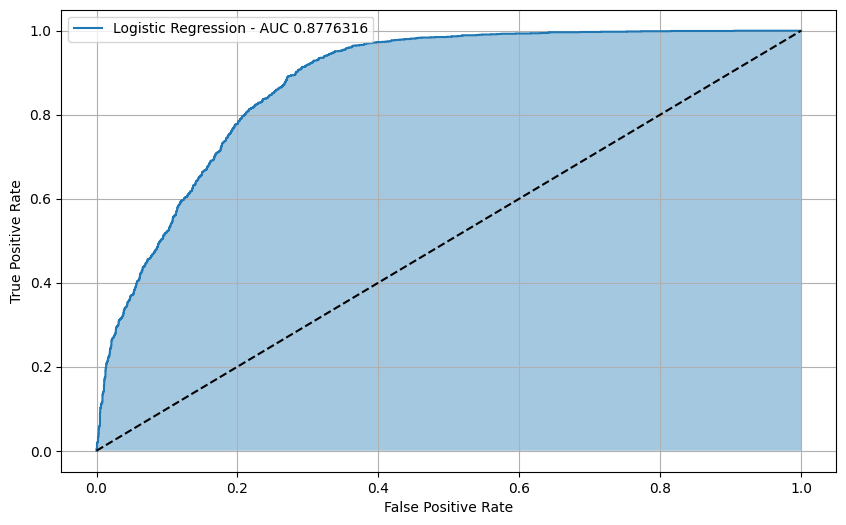

Optimal threshold: 0.2832722775786171


In [1042]:
# Train logistic regression model
model = LogisticRegression(max_iter=500, n_jobs=-1)  # Increased max_iter to avoid convergence issues
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_score = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')  # Random classifier line

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(['Logistic Regression - AUC {:.7f}'.format(roc_auc_score(y_test, y_score))])

ax.fill_between(fpr, tpr, step="pre", alpha=0.4)
plt.grid()
plt.show()

# Calculate the optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)  # Youden's J statistic
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold:", optimal_threshold)


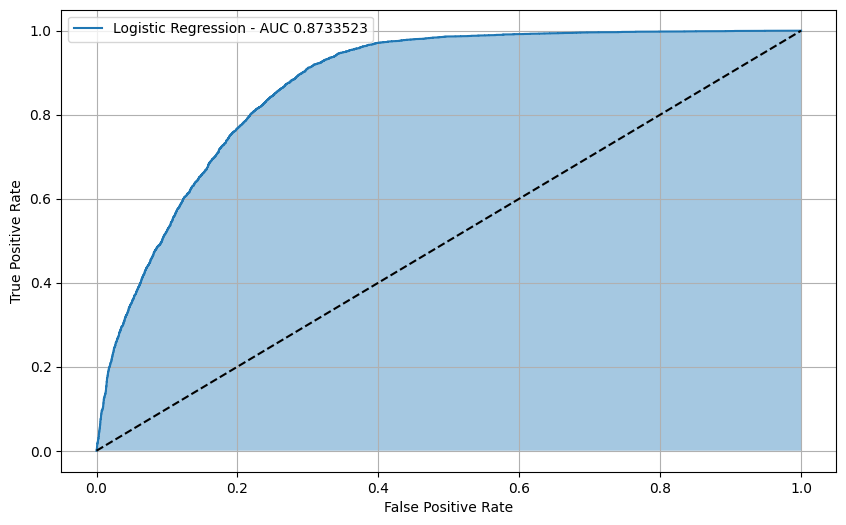

Optimal threshold: 0.2782577011086312


In [1043]:
# Define target variable
model = LogisticRegression(max_iter=500, n_jobs=-1)

# Set up stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Perform cross-validated predictions
y_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = roc_auc_score(y, y_prob)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')  # Random classifier line

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(['Logistic Regression - AUC {:.7f}'.format(roc_auc)])

ax.fill_between(fpr, tpr, step="pre", alpha=0.4)
plt.grid()
plt.show()

# Calculate the optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)  # Youden's J statistic
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold:", optimal_threshold)


## Decision Tree

In [327]:
# dt = DecisionTreeClassifier(random_state=1, max_depth=5)
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scores = cross_val_score(dt, X_train, y_train, cv = skf, scoring="roc_auc")

In [328]:
# scores

In [329]:
# scores.mean()

In [598]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Initialize the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=seed, max_depth=5)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

train_scores = []
val_scores = []

# Loop through each fold
for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the train fold
    model.fit(X_tr, y_tr)

    # Predict probabilities to calculate ROC-AUC
    train_proba = model.predict_proba(X_tr)[:, 1]
    val_proba = model.predict_proba(X_val)[:, 1]

    # Calculate ROC-AUC for train and validation folds
    train_auc = roc_auc_score(y_tr, train_proba)
    val_auc = roc_auc_score(y_val, val_proba)

    train_scores.append(train_auc)
    val_scores.append(val_auc)

# Convert lists to NumPy arrays for easier calculations
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)

# Calculate mean, std, and difference between train and validation scores
train_mean = train_scores.mean()
train_std = train_scores.std()
val_mean = val_scores.mean()
val_std = val_scores.std()
score_diff = train_mean - val_mean



In [603]:
# Display the results
print(f"Train ROC-AUC Scores: {train_scores}")
print(f"Validation ROC-AUC Scores: {val_scores}")
print(f"Train Mean: {train_mean:.4f} +- {train_std:.4f}")
print(f"Validation Mean: {val_mean:.4f} +- {val_std:.4f}")
print(f"Difference (Train - Validation): {score_diff:.4f}")


Train ROC-AUC Scores: [0.87380298 0.87885063 0.87280811 0.86990019 0.8742567 ]
Validation ROC-AUC Scores: [0.86087498 0.83801193 0.85816823 0.8652577  0.85131698]
Train Mean: 0.8739 +- 0.0029
Validation Mean: 0.8547 +- 0.0095
Difference (Train - Validation): 0.0192


In [332]:
model = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=2, min_samples_leaf=10,criterion='gini', min_impurity_decrease=0.0)
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

train_scores = []
val_scores = []

# Loop through each fold
for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the train fold
    model.fit(X_tr, y_tr)

    # Predict probabilities to calculate ROC-AUC
    train_proba = model.predict_proba(X_tr)[:, 1]
    val_proba = model.predict_proba(X_val)[:, 1]

    # Calculate ROC-AUC for train and validation folds
    train_auc = roc_auc_score(y_tr, train_proba)
    val_auc = roc_auc_score(y_val, val_proba)

    train_scores.append(train_auc)
    val_scores.append(val_auc)

# Convert lists to NumPy arrays for easier calculations
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)

# Calculate mean, std, and difference between train and validation scores
train_mean = train_scores.mean()
train_std = train_scores.std()
val_mean = val_scores.mean()
val_std = val_scores.std()
score_diff = train_mean - val_mean


In [333]:
# Display the results
print(f"Train ROC-AUC Scores: {train_scores}")
print(f"Validation ROC-AUC Scores: {val_scores}")
print(f"Train Mean: {train_mean:.4f} +- {train_std:.4f}")
print(f"Validation Mean: {val_mean:.4f} +- {val_std:.4f}")
print(f"Difference (Train - Validation): {score_diff:.4f}")


Train ROC-AUC Scores: [0.87409531 0.8747698  0.87150715 0.87182257 0.87563226]
Validation ROC-AUC Scores: [0.85946439 0.85166208 0.86113061 0.86335338 0.85113108]
Train Mean: 0.8736 +- 0.0016
Validation Mean: 0.8573 +- 0.0050
Difference (Train - Validation): 0.0162


In [334]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Параметры для оптимизации
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(1, 30),
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0.0, 0.001, 0.005, 0.01, 0.05, 0.1]
}

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=100, 
    scoring='roc_auc', 
    cv=skf, 
    random_state=1,
    n_jobs=-1
)

# Обучение модели с RandomizedSearchCV
random_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший ROC-AUC: {random_search.best_score_}")


Лучшие параметры: {'criterion': 'entropy', 'max_depth': 18, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 25, 'min_samples_split': 12}
Лучший ROC-AUC: 0.8569677364354821


In [335]:
from sklearn.model_selection import GridSearchCV

# Параметры для оптимизации (более детальный подбор)
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0.0, 0.01, 0.05]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='roc_auc', 
    cv=skf, 
    n_jobs=-1
)

# Обучение модели с GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC: {grid_search.best_score_}")


Лучшие параметры: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучший ROC-AUC: 0.8574198071382435


In [336]:
from sklearn.metrics import roc_auc_score
model = DecisionTreeClassifier(random_state=1, max_depth=2, criterion='gini', min_samples_split=2, min_samples_leaf=10)
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

train_scores = []
val_scores = []

# Loop through each fold
for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]


    # Fit the model on the train fold
    model.fit(X_tr, y_tr)

    # Predict probabilities to calculate ROC-AUC
    train_proba = model.predict_proba(X_tr)[:, 1]
    val_proba = model.predict_proba(X_val)[:, 1]

    # Calculate ROC-AUC for train and validation folds
    train_auc = roc_auc_score(y_tr, train_proba)
    val_auc = roc_auc_score(y_val, val_proba)

    train_scores.append(train_auc)
    val_scores.append(val_auc)

# Convert lists to NumPy arrays for easier calculations
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)

# Calculate mean, std, and difference between train and validation scores
train_mean = train_scores.mean()
train_std = train_scores.std()
val_mean = val_scores.mean()
val_std = val_scores.std()
score_diff = train_mean - val_mean


In [337]:
# Display the results
print(f"Train ROC-AUC Scores: {train_scores}")
print(f"Validation ROC-AUC Scores: {val_scores}")
print(f"Train Mean: {train_mean:.4f} +- {train_std:.4f}")
print(f"Validation Mean: {val_mean:.4f} +- {val_std:.4f}")
print(f"Difference (Train - Validation): {score_diff:.4f}")


Train ROC-AUC Scores: [0.827708   0.82815103 0.82596988 0.8258378  0.82860362]
Validation ROC-AUC Scores: [0.82388996 0.81933536 0.83097894 0.82332611 0.81928785]
Train Mean: 0.8273 +- 0.0011
Validation Mean: 0.8234 +- 0.0043
Difference (Train - Validation): 0.0039


## Learning Curve

In [338]:
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv = skf, scoring = "roc_auc", train_sizes = np.linspace(0.1, 1.0, 10))

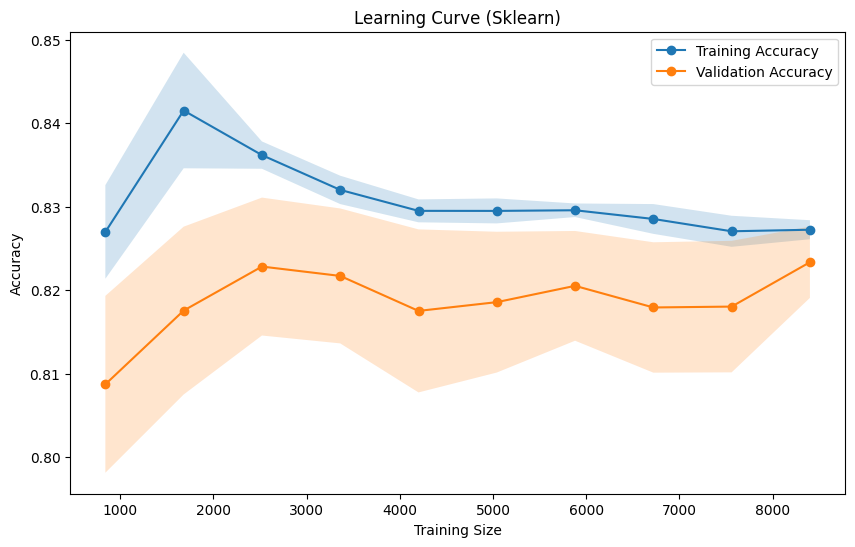

In [339]:
# Calculate mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Sklearn)')
plt.legend(loc='best')
plt.show()


## Random Forest

In [340]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import numpy as np

# Инициализация модели случайного леса
model = RandomForestClassifier(
    random_state=1, 
    n_estimators=10,    # количество деревьев
    max_depth=5,         # максимальная глубина дерева
    min_samples_split=2, # минимальное количество образцов для разбиения
    min_samples_leaf=10, # минимальное количество образцов в листе
    criterion='gini',    # критерий для оценки качества разбиений
    n_jobs=-1            # использовать все доступные ядра процессора для параллелизации
)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)

train_scores = []
val_scores = []

# Loop through each fold
for train_index, val_index in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]


    # Fit the model on the train fold
    model.fit(X_tr, y_tr)

    # Predict probabilities to calculate ROC-AUC
    train_proba = model.predict_proba(X_tr)[:, 1]
    val_proba = model.predict_proba(X_val)[:, 1]

    # Calculate ROC-AUC for train and validation folds
    train_auc = roc_auc_score(y_tr, train_proba)
    val_auc = roc_auc_score(y_val, val_proba)

    train_scores.append(train_auc)
    val_scores.append(val_auc)

# Convert lists to NumPy arrays for easier calculations
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)

# Calculate mean, std, and difference between train and validation scores
train_mean = train_scores.mean()
train_std = train_scores.std()
val_mean = val_scores.mean()
val_std = val_scores.std()
score_diff = train_mean - val_mean

# Вывод результатов
print(f"Среднее значение ROC-AUC на тренировочной выборке: {train_mean:.4f} ± {train_std:.4f}")
print(f"Среднее значение ROC-AUC на валидационной выборке: {val_mean:.4f} ± {val_std:.4f}")
print(f"Разница между тренировочной и валидационной ROC-AUC: {score_diff:.4f}")


Среднее значение ROC-AUC на тренировочной выборке: 0.8802 ± 0.0016
Среднее значение ROC-AUC на валидационной выборке: 0.8667 ± 0.0055
Разница между тренировочной и валидационной ROC-AUC: 0.0135


In [341]:
train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv = skf, scoring = "roc_auc", train_sizes = np.linspace(0.1, 1.0, 10))

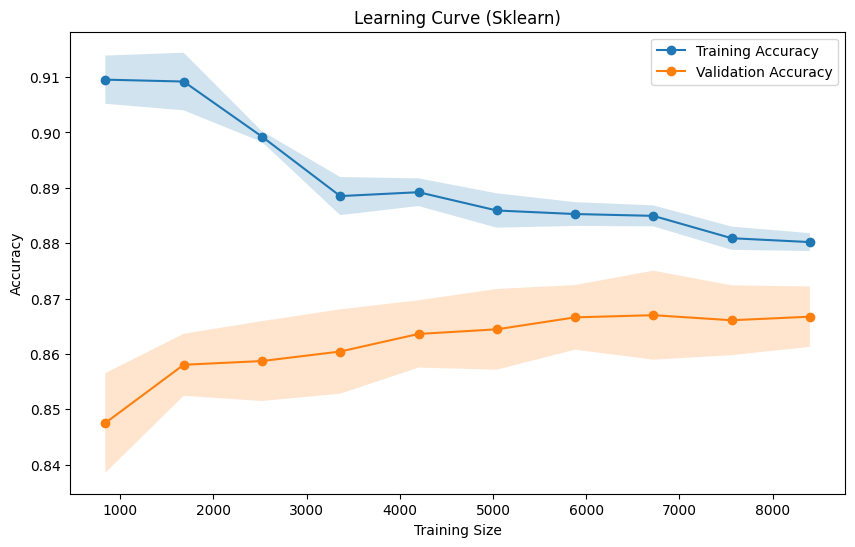

In [342]:
# Calculate mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Sklearn)')
plt.legend(loc='best')
plt.show()


## Randomized search with checking overfitting 

In [1044]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Параметры для оптимизации
param_dist = {
    'n_estimators':[300,500, 750, 1000],
    'max_depth': [None,5,8],
    'min_samples_split': [2, 5, 8]
}

# Инициализация RandomizedSearchCV
model = RandomForestClassifier(
    random_state=1, 
    n_jobs=4
)

random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=15, 
    scoring='roc_auc', 
    cv=5,
    return_train_score=True
)

# Обучение модели с RandomizedSearchCV
random_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший ROC-AUC: {random_search.best_score_}")

Лучшие параметры: {'n_estimators': 1000, 'min_samples_split': 5, 'max_depth': None}
Лучший ROC-AUC: 0.8790802787904815


In [1049]:
all_cv_results = pd.DataFrame(random_search.cv_results_)

In [1050]:
pd.DataFrame(random_search.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split', 'param_max_depth',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [1051]:
cv_results = pd.DataFrame(random_search.cv_results_)[["mean_test_score", "mean_train_score"]]
cv_results

mean_test_score  mean_train_score
0          0.878827          1.000000
1          0.866975          0.881829
2          0.867283          0.882012
3          0.875740          0.931516
4          0.875863          0.927875
5          0.875718          0.931509
6          0.875904          0.929955
7          0.879051          0.998699
8          0.866807          0.881714
9          0.878655          0.999959
10         0.866862          0.881625
11         0.879080          0.999968
12         0.875912          0.929768
13         0.878775          0.999968
14         0.878994          0.998693

In [1052]:
cv_results["diff"] = cv_results["mean_train_score"] - cv_results["mean_test_score"]

In [1053]:
cv_results.sort_values(by= "diff")

mean_test_score  mean_train_score      diff
2          0.867283          0.882012  0.014729
10         0.866862          0.881625  0.014763
1          0.866975          0.881829  0.014854
8          0.866807          0.881714  0.014907
4          0.875863          0.927875  0.052012
12         0.875912          0.929768  0.053856
6          0.875904          0.929955  0.054051
3          0.875740          0.931516  0.055776
5          0.875718          0.931509  0.055791
7          0.879051          0.998699  0.119648
14         0.878994          0.998693  0.119700
11         0.879080          0.999968  0.120888
0          0.878827          1.000000  0.121173
13         0.878775          0.999968  0.121193
9          0.878655          0.999959  0.121304

In [1054]:
all_cv_results.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        7.520254      0.412079         0.235082        0.013199   
1        2.333502      0.071627         0.156926        0.011267   
2        1.372327      0.034190         0.087534        0.005919   
3        5.255038      0.959876         0.296205        0.071622   
4        8.153024      0.847839         0.522109        0.092272   
5        4.332588      1.032512         0.203375        0.085739   
6        7.101951      0.619066         0.399877        0.124005   
7       12.446622      1.818778         0.426291        0.067741   
8        4.445649      0.143049         0.301418        0.064389   
9        3.530764      0.547943         0.239584        0.182245   
10       7.372724      1.848877         0.392483        0.070404   
11      11.417273      0.967511         0.461006        0.085170   
12       1.903049      0.186660         0.098171        0.008988   
13       5.254523      0.477908         0.185739        0.010567   
14       5.917370      1.196909         0.220061        0.057617   

    param_n_estimators  param_min_samples_split param_max_depth  \
0                  750                        2            None   
1                  500                        5               5   
2                  300                        8               5   
3                  750                        2               8   
4                 1000                        8               8   
5                  500                        2               8   
6                 1000                        5               8   
7                 1000                        8            None   
8                 1000                        5               5   
9                  300                        5            None   
10                1000                        8               5   
11                1000                        5            None   
12                 300                        5               8   
13                 500                        5            None   
14                 500                        8            None   

                                               params  split0_test_score  \
0   {'n_estimators': 750, 'min_samples_split': 2, ...           0.882439   
1   {'n_estimators': 500, 'min_samples_split': 5, ...           0.871049   
2   {'n_estimators': 300, 'min_samples_split': 8, ...           0.870770   
3   {'n_estimators': 750, 'min_samples_split': 2, ...           0.879776   
4   {'n_estimators': 1000, 'min_samples_split': 8,...           0.879543   
5   {'n_estimators': 500, 'min_samples_split': 2, ...           0.879474   
6   {'n_estimators': 1000, 'min_samples_split': 5,...           0.879553   
7   {'n_estimators': 1000, 'min_samples_split': 8,...           0.883100   
8   {'n_estimators': 1000, 'min_samples_split': 5,...           0.871227   
9   {'n_estimators': 300, 'min_samples_split': 5, ...           0.882595   
10  {'n_estimators': 1000, 'min_samples_split': 8,...           0.871226   
11  {'n_estimators': 1000, 'min_samples_split': 5,...           0.882866   
12  {'n_estimators': 300, 'min_samples_split': 5, ...           0.879460   
13  {'n_estimators': 500, 'min_samples_split': 5, ...           0.882509   
14  {'n_estimators': 500, 'min_samples_split': 8, ...           0.883895   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.876381  ...         0.878827        0.003351                4   
1            0.865314  ...         0.866975        0.003582               13   
2            0.865961  ...         0.867283        0.003448               12   
3            0.874339  ...         0.875740        0.003850               10   
4            0.874739  ...         0.875863        0.003677                9   
5            0.874505  ...         0.875718        0.003773               11   
6            0.874524  ...         0.875904        0.003726      

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(random_search, X_train, y_train, cv = skf, scoring = "roc_auc", train_sizes = np.linspace(0.1, 1.0, 10))
# Calculate mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Sklearn)')
plt.legend(loc='best')
plt.show()


SyntaxError: invalid decimal literal (930050589.py, line 1)

## Randomized search with checking overfitting with polynomial

In [274]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Инициализация PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Преобразование признаков X_train в полиномиальные
X_train_poly = poly.fit_transform(X_train)

# Параметры для оптимизации
param_dist = {
    'n_estimators': [100, 300, 500, 750, 1000],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 8]
}

# Инициализация RandomForestClassifier
model = RandomForestClassifier(random_state=1, n_jobs=4)

# Инициализация RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,  # Количество случайных комбинаций
    scoring='roc_auc',  # Оценка по ROC-AUC
    cv=5,  # Кросс-валидация на 5 фолдах
    return_train_score=True,
    random_state=42  # Для воспроизводимости результатов
)

# Обучение модели с RandomizedSearchCV на полиномиальных признаках
random_search.fit(X_train_poly, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший ROC-AUC: {random_search.best_score_}")

# Преобразование тестовых данных в полиномиальные признаки
X_test_poly = poly.transform(X_test)

# Предсказания на тестовом наборе
y_pred_test = random_search.best_estimator_.predict_proba(X_test_poly)[:, 1]


Лучшие параметры: {'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 10}
Лучший ROC-AUC: 0.8847863347401163


In [275]:
all_cv_results = pd.DataFrame(random_search.cv_results_)

In [276]:
pd.DataFrame(random_search.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split', 'param_max_depth',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [277]:
cv_results = pd.DataFrame(random_search.cv_results_)[["mean_test_score", "mean_train_score"]]
cv_results

mean_test_score  mean_train_score
0          0.884753          0.974925
1          0.881448          0.943265
2          0.882528          0.944101
3          0.884292          0.972111
4          0.882794          0.973576
5          0.883996          0.971764
6          0.874791          0.894714
7          0.874644          0.894433
8          0.874676          0.894579
9          0.874747          0.894699
10         0.874288          0.894279
11         0.883275          0.946103
12         0.884786          0.977033
13         0.883357          0.947316
14         0.883235          0.947220
15         0.874721          0.894506
16         0.884114          0.972109
17         0.881778          0.946093
18         0.874729          0.894588
19         0.882944          0.947078

In [278]:
cv_results["diff"] = cv_results["mean_train_score"] - cv_results["mean_test_score"]

In [279]:
cv_results.sort_values(by= "diff")

mean_test_score  mean_train_score      diff
15         0.874721          0.894506  0.019784
7          0.874644          0.894433  0.019789
18         0.874729          0.894588  0.019859
8          0.874676          0.894579  0.019903
6          0.874791          0.894714  0.019923
9          0.874747          0.894699  0.019952
10         0.874288          0.894279  0.019990
2          0.882528          0.944101  0.061573
1          0.881448          0.943265  0.061816
11         0.883275          0.946103  0.062827
13         0.883357          0.947316  0.063958
14         0.883235          0.947220  0.063985
19         0.882944          0.947078  0.064134
17         0.881778          0.946093  0.064315
5          0.883996          0.971764  0.087769
3          0.884292          0.972111  0.087819
16         0.884114          0.972109  0.087995
0          0.884753          0.974925  0.090172
4          0.882794          0.973576  0.090782
12         0.884786          0.977033  0.092246

In [280]:
all_cv_results.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       34.908604      1.667987         0.678888        0.177495   
1        2.969621      0.161266         0.118532        0.074942   
2        8.603636      0.404072         0.188371        0.059077   
3       25.175657      0.420138         0.468719        0.082431   
4        3.477876      0.181351         0.121081        0.074076   
5       10.054735      0.176842         0.163250        0.017135   
6       18.192159      0.470687         0.914031        0.551354   
7        9.218741      0.136663         0.260330        0.047440   
8       13.560233      0.286272         0.515698        0.349367   
9       13.590099      0.190415         0.756098        0.383484   
10       5.507808      0.147245         0.216723        0.150810   
11      28.900838      0.921772         0.701186        0.254513   
12      17.451441      0.775420         0.327387        0.035130   
13      32.211762      8.261307         0.755746        0.254294   
14      14.778521      4.825852         0.382304        0.077483   
15      15.885809      2.175452         0.376031        0.060523   
16      15.129445      1.997878         0.323033        0.103863   
17       2.421713      0.275732         0.073563        0.025924   
18      25.594499      3.886893         0.723377        0.099148   
19      10.980498      2.688582         0.192666        0.037675   

    param_n_estimators  param_min_samples_split  param_max_depth  \
0                 1000                        5               10   
1                  100                        8                8   
2                  300                        8                8   
3                  750                        8               10   
4                  100                        5               10   
5                  300                        8               10   
6                 1000                        2                5   
7                  500                        8                5   
8                  750                        5                5   
9                  750                        2                5   
10                 300                        5                5   
11                1000                        5                8   
12                 500                        2               10   
13                1000                        2                8   
14                 500                        2                8   
15                 750                        8                5   
16                 500                        8               10   
17                 100                        2                8   
18                1000                        5                5   
19                 300                        2                8   

                                               params  split0_test_score  \
0   {'n_estimators': 1000, 'min_samples_split': 5,...           0.888899   
1   {'n_estimators': 100, 'min_samples_split': 8, ...           0.886014   
2   {'n_estimators': 300, 'min_samples_split': 8, ...           0.886520   
3   {'n_estimators': 750, 'min_samples_split': 8, ...           0.887995   
4   {'n_estimators': 100, 'min_samples_split': 5, ...           0.886140   
5   {'n_estimators': 300, 'min_samples_split': 8, ...           0.887779   
6   {'n_estimators': 1000, 'min_samples_split': 2,...           0.879597   
7   {'n_estimators': 500, 'min_samples_split': 8, ...           0.879516   
8   {'n_estimators': 750, 'min_samples_split': 5, ...           0.879378   
9   {'n_estimators': 750, 'min_samples_split': 2, ...           0.879389   
10  {'n_estimators': 300, 'min_samples_split': 5, ...           0.878959   
11  {'n_estimators': 1000, 'min_samples_split': 5,...           0.886585   
12  {'n_estimators': 500, 'min_samples_split': 2, ...           0.888520   
13  {'n_estimators': 1000, 'min_samples_split': 2,...           0.886606   
14  {'

# Optuna

In [1056]:
import optuna

def objective(trial):
    # Suggest hyperparameters to search
    n_estimators = trial.suggest_int("n_estimators", 50, 1000)
    max_depth = trial.suggest_int("max_depth", 2, 40)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])

    # Create the model with suggested hyperparameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=seed,
        n_jobs=-1
    )

    # Evaluate using cross-validation (with ROC-AUC as scoring metric)
    roc_auc = cross_val_score(rf, X_train, y_train, cv=skf, scoring="roc_auc", n_jobs=-1).mean()
    
    return roc_auc

# Create and run an Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)


[I 2024-10-27 19:39:42,088] A new study created in memory with name: no-name-bdf0558e-bbdd-48ba-9441-c941d8ea25a8
[I 2024-10-27 19:40:08,184] Trial 0 finished with value: 0.8774497315534309 and parameters: {'n_estimators': 89, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None}. Best is trial 0 with value: 0.8774497315534309.
[I 2024-10-27 19:40:14,485] Trial 1 finished with value: 0.8768074738877635 and parameters: {'n_estimators': 131, 'max_depth': 20, 'min_samples_split': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8774497315534309.
[I 2024-10-27 19:40:22,130] Trial 2 finished with value: 0.8763542867888056 and parameters: {'n_estimators': 78, 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8774497315534309.
[I 2024-10-27 19:40:26,657] Trial 3 finished with value: 0.8597379616222012 and parameters: {'n_estimators': 149, 'max_depth': 4, 'min_

In [1057]:

# Print the best parameters and score
print("Best Parameters:", study.best_params)
print("Best ROC-AUC:", study.best_value)

# Train the best model on the full training set
best_rf = RandomForestClassifier(**study.best_params, random_state=seed, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Evaluate on the test set
test_roc_auc = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])
print("Test ROC-AUC:", test_roc_auc)


Best Parameters: {'n_estimators': 869, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
Best ROC-AUC: 0.8789043114285331
Test ROC-AUC: 0.886786967199574


In [790]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score

def objective(trial):
    # Define the hyperparameters for the trial
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    max_features = trial.suggest_categorical("max_features", ["sqrt"])

    # Initialize classifier with the suggested hyperparameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        max_features=max_features,
        random_state=seed
    )

    # Use StratifiedKFold to get train/validation splits
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    train_scores = []
    val_scores = []

    # Perform cross-validation
    for train_index, val_index in cv.split(X_train, y_train):
        X_t, X_v = X_train.iloc[train_index], X_train.iloc[val_index]
        y_t, y_v = y_train.iloc[train_index], y_train.iloc[val_index]

        # Train the model
        rf.fit(X_t, y_t)

        # Compute ROC-AUC for both train and validation sets
        train_score = roc_auc_score(y_t, rf.predict_proba(X_t)[:, 1])
        val_score = roc_auc_score(y_v, rf.predict_proba(X_v)[:, 1])

        train_scores.append(train_score)
        val_scores.append(val_score)

    # Calculate the mean ROC-AUC scores
    mean_train_score = sum(train_scores) / len(train_scores)
    mean_val_score = sum(val_scores) / len(val_scores)

    # Minimize the difference between train and validation scores
    score_diff = abs(mean_train_score - mean_val_score)

    # We want to maximize the validation ROC-AUC, so return a combination of both
    return mean_val_score - score_diff

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best parameters and score
print("Best Parameters (Optuna):", study.best_params)
print("Best Score (Optuna):", study.best_value)


[I 2024-10-27 20:10:52,409] A new study created in memory with name: no-name-9019f849-6a4b-4da9-a41b-557718da4483


# Submission

In [1079]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
#n_estimators': 869, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'sqrt'}
# Параметры для оптимизации
param_dist = {
    'n_estimators':[869],
    'max_depth': [39],
    'min_samples_split': [2],
    'min_samples_leaf': [8]
}

# Инициализация RandomizedSearchCV
model = RandomForestClassifier(
    random_state=1, 
    n_jobs=4
)

random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=1, 
    scoring='roc_auc', 
    cv=5,
    return_train_score=True
)

# Обучение модели с RandomizedSearchCV
random_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие параметры: {random_search.best_params_}")
print(f"Лучший ROC-AUC: {random_search.best_score_}")

Лучшие параметры: {'n_estimators': 869, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': 39}
Лучший ROC-AUC: 0.8788436749988877


In [1080]:
all_cv_results = pd.DataFrame(random_search.cv_results_)

In [1081]:
pd.DataFrame(random_search.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_depth', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [1082]:
cv_results = pd.DataFrame(random_search.cv_results_)[["mean_test_score", "mean_train_score"]]
cv_results

mean_test_score  mean_train_score
0         0.878844          0.968209

In [1083]:
cv_results["diff"] = cv_results["mean_train_score"] - cv_results["mean_test_score"]

In [1084]:
cv_results.sort_values(by= "diff")

mean_test_score  mean_train_score      diff
0         0.878844          0.968209  0.089366

In [1064]:
all_cv_results.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.731284      1.824497         0.467625        0.086685   

   param_n_estimators  param_min_samples_split  param_min_samples_leaf  \
0                 869                        2                       8   

   param_max_depth                                             params  \
0               39  {'n_estimators': 869, 'min_samples_split': 2, ...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0            0.88343  ...         0.878999        0.003592                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.968628            0.968335            0.968546   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.967783            0.968129          0.968284         0.000305  

[1 rows x 24 columns]

Rab stol
Testni optimal roc-aucini bilan  predlar %i

In [1071]:
import numpy as np

# Подсчитываем количество нулей в каждом столбце
zero_counts = (test == 0).sum()

# Подсчитываем количество бесконечных значений (Infinity) в каждом столбце
inf_counts = np.isinf(test).sum()

# Выводим столбцы, в которых есть нули или бесконечности
columns_with_zeros_or_infs = pd.DataFrame({
    'Zeros': zero_counts[zero_counts > 0],
    'Infinities': inf_counts[inf_counts > 0]
}).dropna(how='all')  # Убираем строки, где нет ни нулей, ни бесконечностей

print("Столбцы с нулями или бесконечными значениями и их количество:")
print(columns_with_zeros_or_infs)


Столбцы с нулями или бесконечными значениями и их количество:
                         Zeros  Infinities
Age_Cat                   2381         NaN
BMI                          1         NaN
Blood_Pressure_Category   5122         NaN
Eyesight_Imbalance        4311         NaN
Hearing_Imbalance         9936         NaN
Waist_Cat                 2011         NaN
dental caries             8560         NaN
triglyceride_Cat          2126         NaN
weight(kg)                   1         NaN


In [1073]:
test.columns

Index(['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'BMI', 'WHR',
       'Blood_Pressure_Category', 'Cholesterol_Ratio', 'Liver_Enzyme_Ratio',
       'Hemoglobin_Gtp_Ratio', 'Systolic_Diastolic_Ratio', 'Hearing_Imbalance',
       'Eyesight_Imbalance', 'Age_Cat', 'Waist_Cat', 'triglyceride_Cat'],
      dtype='object')

In [1076]:
# Инициализация RandomizedSearchCV
model = RandomForestClassifier(
    random_state=1, 
    n_jobs=4,
    n_estimators = 869,
    max_depth = 39,
    min_samples_split = 2,
    min_samples_leaf = 8
)

# Обучение модели с RandomizedSearchCV
model.fit(X, y)

# Делаем предсказания и оцениваем модель стекинга
y_pred_test = model.predict_proba(test)[:, 1]

In [1077]:
df_submission = pd.DataFrame(pd.read_csv("test.csv")["id"])
df_submission["smoking"] = y_pred_test
df_submission

id   smoking
0     15000  0.759467
1     15001  0.020461
2     15002  0.031928
3     15003  0.041794
4     15004  0.441304
...     ...       ...
9995  24995  0.335016
9996  24996  0.688596
9997  24997  0.296194
9998  24998  0.010945
9999  24999  0.702516

[10000 rows x 2 columns]

In [1078]:
df_submission.to_csv("sample_submission.csv", index=False)

## Submission with poly

In [1085]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model = RandomForestClassifier(
    random_state=1, 
    n_jobs=4,
    n_estimators = 869,
    max_depth = 39,
    min_samples_split = 2,
    min_samples_leaf = 8
)
model.fit(X_poly, y)
test_poly = poly.transform(test)
y_pred_test = model.predict_proba(test_poly)[:, 1]


In [1086]:
df_submission = pd.DataFrame(pd.read_csv("test.csv")["id"])
df_submission["smoking"] = y_pred_test
df_submission

id   smoking
0     15000  0.796619
1     15001  0.012115
2     15002  0.030281
3     15003  0.025328
4     15004  0.464370
...     ...       ...
9995  24995  0.312900
9996  24996  0.727722
9997  24997  0.328337
9998  24998  0.008779
9999  24999  0.669535

[10000 rows x 2 columns]

In [1087]:
df_submission.to_csv("my_submission_poly.csv", index=False)